**Nama : Delfrin Adiyatma Situmeang**

**Batch : MSIB**

`Program ini dibuat untuk menggunakan feature engineering untuk mengolah data mentah menjadi data siap pakai yang akan dimodelkan menggunakan 3 Model klasifikasi (Logistic Regression, SVM, dan kNN) dimana base modelnya akan di cross-validate serta di-tuning. Semua proses tersebut akan dirangkai dalam pipeline`

# Answer To Conceptual Problem is at the Very Bottom of The File


# SQL Query

In [178]:
from google.colab import auth
auth.authenticate_user()
from google.cloud import bigquery

project_id = 'valid-unfolding-415503'
client = bigquery.Client(project=project_id)

In [179]:
sql = ('''SELECT limit_balance, CAST(sex AS INT64) AS sex, CAST(education_level AS INT64) AS education_level, CAST(marital_status AS INT64) AS marital_status,
age, pay_0, pay_2, pay_3, pay_4, CAST(pay_5 AS FLOAT64) AS pay_5, CAST(pay_6 AS FLOAT64) AS pay_6, bill_amt_1, bill_amt_2, bill_amt_3,
bill_amt_4, bill_amt_5, bill_amt_6, pay_amt_1, pay_amt_2, pay_amt_3, pay_amt_4, pay_amt_5, pay_amt_6, CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM  bigquery-public-data.ml_datasets.credit_card_default''')

# Importing Libraries

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Data Loading

In [181]:
#Baca data dari big query
df = client.query(sql).to_dataframe()
df

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0


In [182]:
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,80000.0,1,6,1,54.0,0.0,0.0,0.0,0.0,0.0,...,29296.0,26210.0,17643.0,2545.0,2208.0,1336.0,2232.0,542.0,348.0,1
1,200000.0,1,4,1,49.0,0.0,0.0,0.0,0.0,0.0,...,50146.0,50235.0,48984.0,1689.0,2164.0,2500.0,3480.0,2500.0,3000.0,0
2,20000.0,2,6,2,22.0,0.0,0.0,0.0,0.0,0.0,...,1434.0,500.0,0.0,4641.0,1019.0,900.0,0.0,1500.0,0.0,1
3,260000.0,2,4,2,33.0,0.0,0.0,0.0,0.0,0.0,...,27821.0,30767.0,29890.0,5000.0,5000.0,1137.0,5000.0,1085.0,5000.0,0
4,150000.0,1,4,2,32.0,0.0,0.0,0.0,-1.0,0.0,...,150464.0,143375.0,146411.0,4019.0,146896.0,157436.0,4600.0,4709.0,5600.0,0
5,300000.0,2,4,2,32.0,0.0,0.0,0.0,0.0,0.0,...,65150.0,-450.0,700.0,15235.0,1491.0,1303.0,0.0,2000.0,1400.0,0
6,130000.0,1,1,1,45.0,0.0,0.0,0.0,0.0,0.0,...,62377.0,63832.0,65099.0,2886.0,2908.0,2129.0,2354.0,2366.0,2291.0,0
7,200000.0,1,1,1,58.0,0.0,0.0,0.0,0.0,0.0,...,124647.0,126921.0,129167.0,7822.0,4417.0,4446.0,4597.0,4677.0,4698.0,0
8,500000.0,1,1,1,39.0,0.0,0.0,0.0,0.0,0.0,...,174500.0,137406.0,204975.0,54209.0,4607.0,4603.0,5224.0,207440.0,7509.0,0
9,230000.0,1,1,1,48.0,0.0,0.0,0.0,0.0,0.0,...,105508.0,108101.0,110094.0,7000.0,6607.0,3773.0,4290.0,4164.0,2000.0,0


In [183]:
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,360000.0,2,2,2,26.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,463.0,2500.0,0.0,0.0,0.0,0.0,0
2956,100000.0,1,3,1,40.0,0.0,0.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,2000.0,2377.0,40000.0,0.0,0.0,0.0,0
2957,30000.0,2,3,1,48.0,1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0
2958,80000.0,2,3,1,39.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,5000.0,5000.0,5000.0,0.0,5000.0,5000.0,470.0,0
2959,20000.0,1,3,2,26.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,1560.0,0.0,0.0,0.0,0.0,0.0,0
2960,80000.0,2,3,2,28.0,-1.0,-1.0,-1.0,-2.0,-2.0,...,0.0,0.0,0.0,2800.0,0.0,0.0,0.0,0.0,0.0,0
2961,50000.0,2,3,1,51.0,-1.0,-1.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,300.0,5880.0,0.0,0.0,0.0,0.0,1
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0,1
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0,0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0,0


# Exploratory Data Analysis

In [184]:
#Cek informasi dari data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   float64
 1   sex                         2965 non-null   Int64  
 2   education_level             2965 non-null   Int64  
 3   marital_status              2965 non-null   Int64  
 4   age                         2965 non-null   float64
 5   pay_0                       2965 non-null   float64
 6   pay_2                       2965 non-null   float64
 7   pay_3                       2965 non-null   float64
 8   pay_4                       2965 non-null   float64
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   float64
 12  bill_amt_2                  2965 non-null   float64
 13  bill_amt_3                  2965 

In [185]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.3086,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
sex,2965.0,1.607757,0.488333,1.0,1.0,2.0,2.0,2.0
education_level,2965.0,1.849578,0.778184,0.0,1.0,2.0,2.0,6.0
marital_status,2965.0,1.559865,0.522317,0.0,1.0,2.0,2.0,3.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
pay_0,2965.0,0.005059,1.114395,-2.0,-1.0,0.0,0.0,8.0
pay_2,2965.0,-0.122428,1.180784,-2.0,-1.0,0.0,0.0,7.0
pay_3,2965.0,-0.141653,1.18363,-2.0,-1.0,0.0,0.0,7.0
pay_4,2965.0,-0.18516,1.178322,-2.0,-1.0,0.0,0.0,8.0
pay_5,2965.0,-0.225295,1.159003,-2.0,-1.0,0.0,0.0,7.0


## Analisis Pay (Repayment Status)

In [186]:
rpstat = ['pay_6', 'pay_5', 'pay_4', 'pay_3', 'pay_2', 'pay_0']

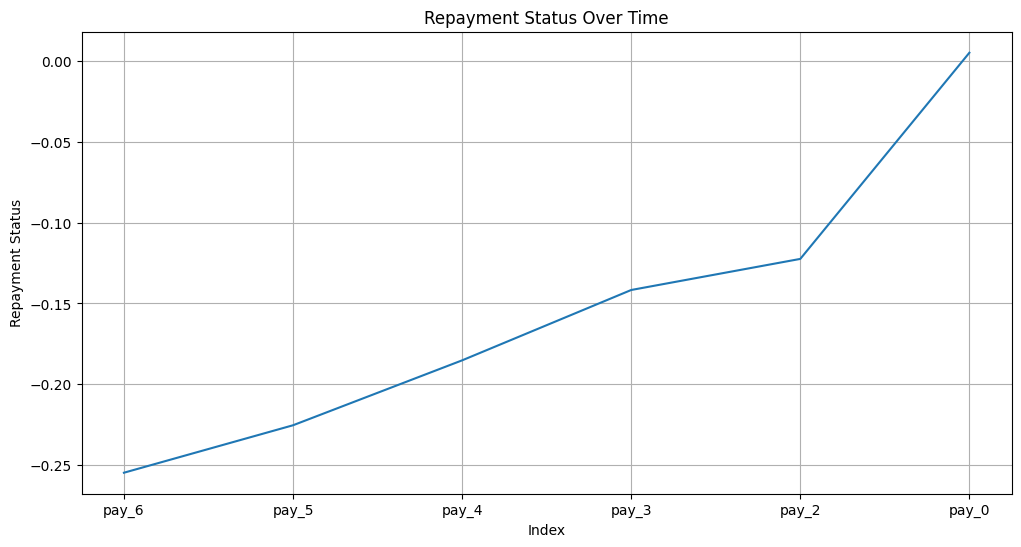

In [187]:
#Plotting linechart
plt.figure(figsize=(12, 6))
plt.plot(df[rpstat].mean(), label=rpstat)

plt.title('Repayment Status Over Time')
plt.xlabel('Index')
plt.ylabel('Repayment Status')
plt.grid(True)
plt.show()

`Linechart yang semakin tinggi seiring dengan berjalannya waktu menunjukkan adanya tren meningkatnya keterlambatan pembayaran tagihan kredit di antara nasabah.`

## Analisis bill_amt (Bill Statement)

In [188]:
billstat = ['bill_amt_6', 'bill_amt_5', 'bill_amt_4', 'bill_amt_3', 'bill_amt_2', 'bill_amt_1']

<ipython-input-189-c4024ce39b03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = billstat, y= df[billstat].mean(), palette = 'viridis')


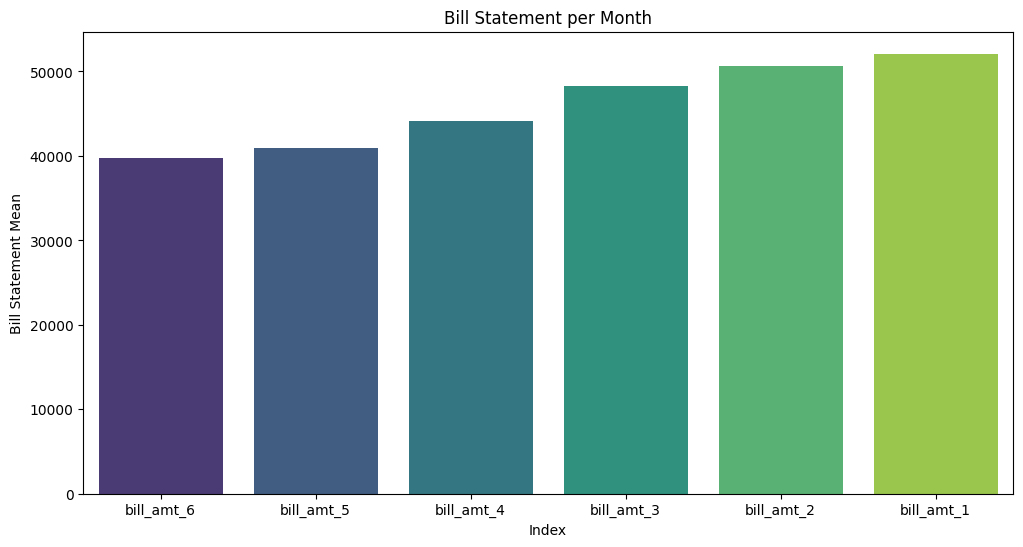

In [189]:
#Plotting barchart untuk melihat rata - rata bill dari setiap bulan
plt.figure(figsize=(12,6))
sns.barplot(x = billstat, y= df[billstat].mean(), palette = 'viridis')
plt.title('Bill Statement per Month')
plt.xlabel('Index')
plt.ylabel('Bill Statement Mean')
plt.show()

`'Barchart menunjukkan bahwa terjadi peningkatan tagihan secara konsisten di seiap bulannya'`

## Analisis pay_amt (Amount of Previous Payment)

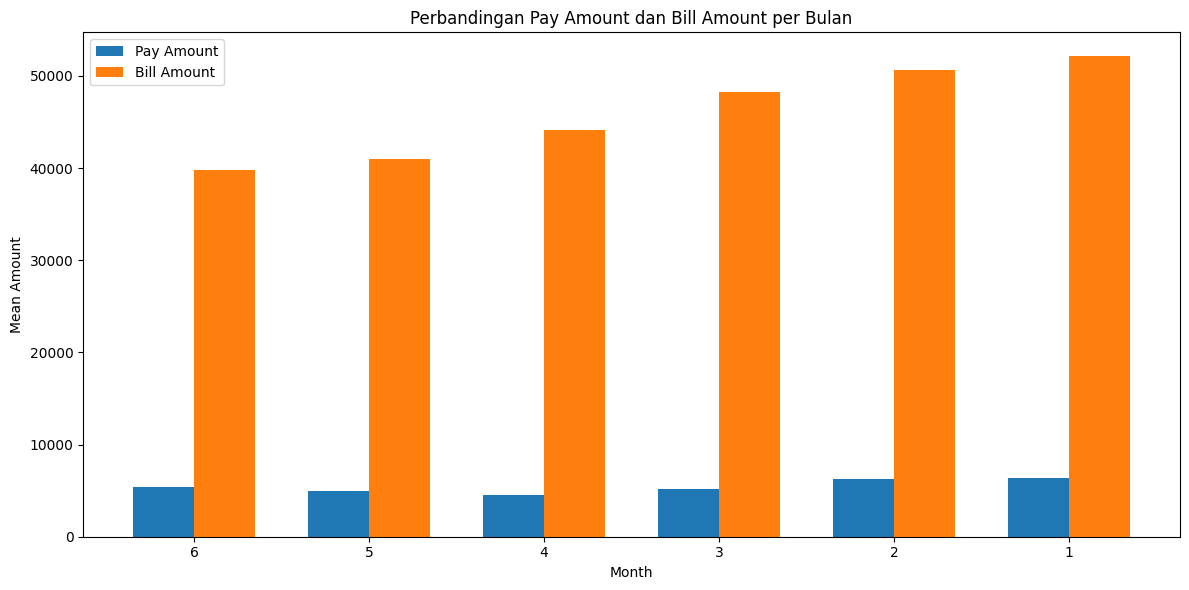

In [190]:
# List kolom pay_amt dan bill_amt
pay_columns = ['pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
bill_columns = ['bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6']

# Memutar urutan kolom dari 6 ke 1
pay_columns = pay_columns[::-1]
bill_columns = bill_columns[::-1]

# List rata-rata dari setiap kolom pay_amt dan bill_amt
pay_means = [df[col].mean() for col in pay_columns]
bill_means = [df[col].mean() for col in bill_columns]

# Membuat bar plot untuk setiap pasang kolom pay_amt dan bill_amt dalam satu plot
bar_width = 0.35
index = np.arange(len(pay_columns))

plt.figure(figsize=(12, 6))

plt.bar(index, pay_means, bar_width, label='Pay Amount')
plt.bar(index + bar_width, bill_means, bar_width, label='Bill Amount')

plt.xlabel('Month')
plt.ylabel('Mean Amount')
plt.title('Perbandingan Pay Amount dan Bill Amount per Bulan')
plt.xticks(index + bar_width / 2, [col.split('_')[-1] for col in pay_columns])
plt.legend()

plt.tight_layout()
plt.show()


`Dapat dilihat pada comparison bar plot bahwa meskipun rata - rata dari bill amount meningkat, pay amount cenderung tidak stabil dan berada di rentang yang sama (jauh lebih kecil dibanding bill) di setiap bulannya, ini menunjukkan bahwa nasabah mulai mengalami kesulitan membayar tagihan yang ada`

`Drop 3 baris dataset untuk model inference`

In [191]:
df_inference = df.tail(3).copy()
df_inference = df_inference.drop(columns='default_payment_next_month')
df = df.drop(df.tail(3).index)

# Feature Engineering

## Split Data

In [192]:
#split data menjadi fitur dan target
X = df.drop(["default_payment_next_month"], axis=1)  # Corrected the missing comma here
y = df['default_payment_next_month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, shuffle=True, random_state=22)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2369, 23), (2369,), (593, 23), (593,))

In [193]:
#Cek
X_train

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1830,110000.0,1,1,1,56.0,3.0,2.0,2.0,3.0,2.0,...,50030.0,48940.0,48026.0,55979.0,0.0,5800.0,0.0,0.0,8774.0,0.0
1346,50000.0,2,1,2,24.0,0.0,0.0,2.0,0.0,0.0,...,52028.0,32140.0,32216.0,31482.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0
143,290000.0,2,1,1,30.0,0.0,0.0,0.0,0.0,0.0,...,218783.0,158215.0,69234.0,71560.0,8000.0,8600.0,6700.0,2600.0,3500.0,0.0
152,360000.0,2,1,2,27.0,0.0,0.0,0.0,0.0,0.0,...,96679.0,79703.0,71682.0,24230.0,20006.0,25006.0,20200.0,40000.0,0.0,0.0
1803,230000.0,1,1,2,29.0,0.0,0.0,2.0,2.0,2.0,...,42804.0,44020.0,41278.0,34672.0,5000.0,0.0,3000.0,0.0,3000.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,260000.0,1,3,1,36.0,-1.0,0.0,0.0,0.0,0.0,...,77156.0,73658.0,70273.0,67100.0,7425.0,2795.0,2779.0,2947.0,3400.0,5000.0
2899,50000.0,2,3,1,52.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1845,30000.0,1,2,2,35.0,0.0,0.0,2.0,2.0,2.0,...,24031.0,25579.0,25030.0,25526.0,5100.0,0.0,1949.0,0.0,912.0,2100.0
2021,50000.0,1,1,2,35.0,0.0,0.0,0.0,0.0,-1.0,...,53920.0,0.0,47566.0,48393.0,1600.0,1000.0,2500.0,47566.0,1700.0,2000.0


In [194]:
#Cek
y_train

1830    1
1346    0
143     0
152     0
1803    0
       ..
1315    0
2899    0
1845    1
2021    0
1188    0
Name: default_payment_next_month, Length: 2369, dtype: Int64

In [195]:
#buat dataframe gabungan untuk analisis
df_fa = pd.concat([X_train, y_train], axis=1)

## Handling Outlier

In [196]:
# Fitur numerikal pada X_train
numeric_columns = X_train.select_dtypes(include=np.number).columns.to_list()

skewed_numeric_data = []
skewed_numeric_columns = []

normal_numeric_data = []
normal_numeric_columns = []

# Membuat for loop
for column in numeric_columns:
    skewness = X_train[column].skew()
    # Jika Normal distribution
    if skewness <= 0.5 and skewness >= -0.5:
        normal_numeric_columns.append(column)
        normal_numeric_data.append([column, skewness])
    # Jika Skewed distribution
    elif skewness < -0.5 or skewness > 0.5:
        skewed_numeric_columns.append(column)
        skewed_numeric_data.append([column, skewness])

In [197]:
# Kolom yang berdistribusi normal
print('Columns with Normal Distribution')
pd.DataFrame(data=normal_numeric_data, columns=['normal_distributed_columns', 'skewness'])

Columns with Normal Distribution


,normal_distributed_columns,skewness
0,sex,-0.433025
1,marital_status,-0.017650


`Tidak ada kolom yang berdistribusi normal, kolom yang tertampilkan merupakan kategorikan yang di encode`

In [198]:
pip install feature_engine

In [199]:
#Import winsorizer
from feature_engine.outliers import Winsorizer

In [200]:
# Capping Method for Skewed Distribution
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=skewed_numeric_columns,
                            missing_values='ignore')

# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [201]:
#Membandingkan distriubsi sebelum dan sesudah handling Outlier
def outlier_handling_plot_comparison(df_before, df_after, variable):
    """
    This function is created to plot histograms and boxplots for a variable before and after outlier handling

    Parameters:
    - df_before (pandas.DataFrame): DataFrame before outlier handling
    - df_after (pandas.DataFrame): DataFrame after outlier handling
    - variable (str): The variable to plot

    Example:
    num_cols = ['numeric_column']                                   <- Enter the numeric column
    for col in num_cols:                                            <- make a for loop in numeric column to access every columns
        plot_distribution_comparison(X_train, X_train_capped, col)  <- put X_train, X_train_capped, and columns in the variable

    """
    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='skyblue')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0], color='lightgreen')
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='skyblue')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1], color='lightgreen')
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

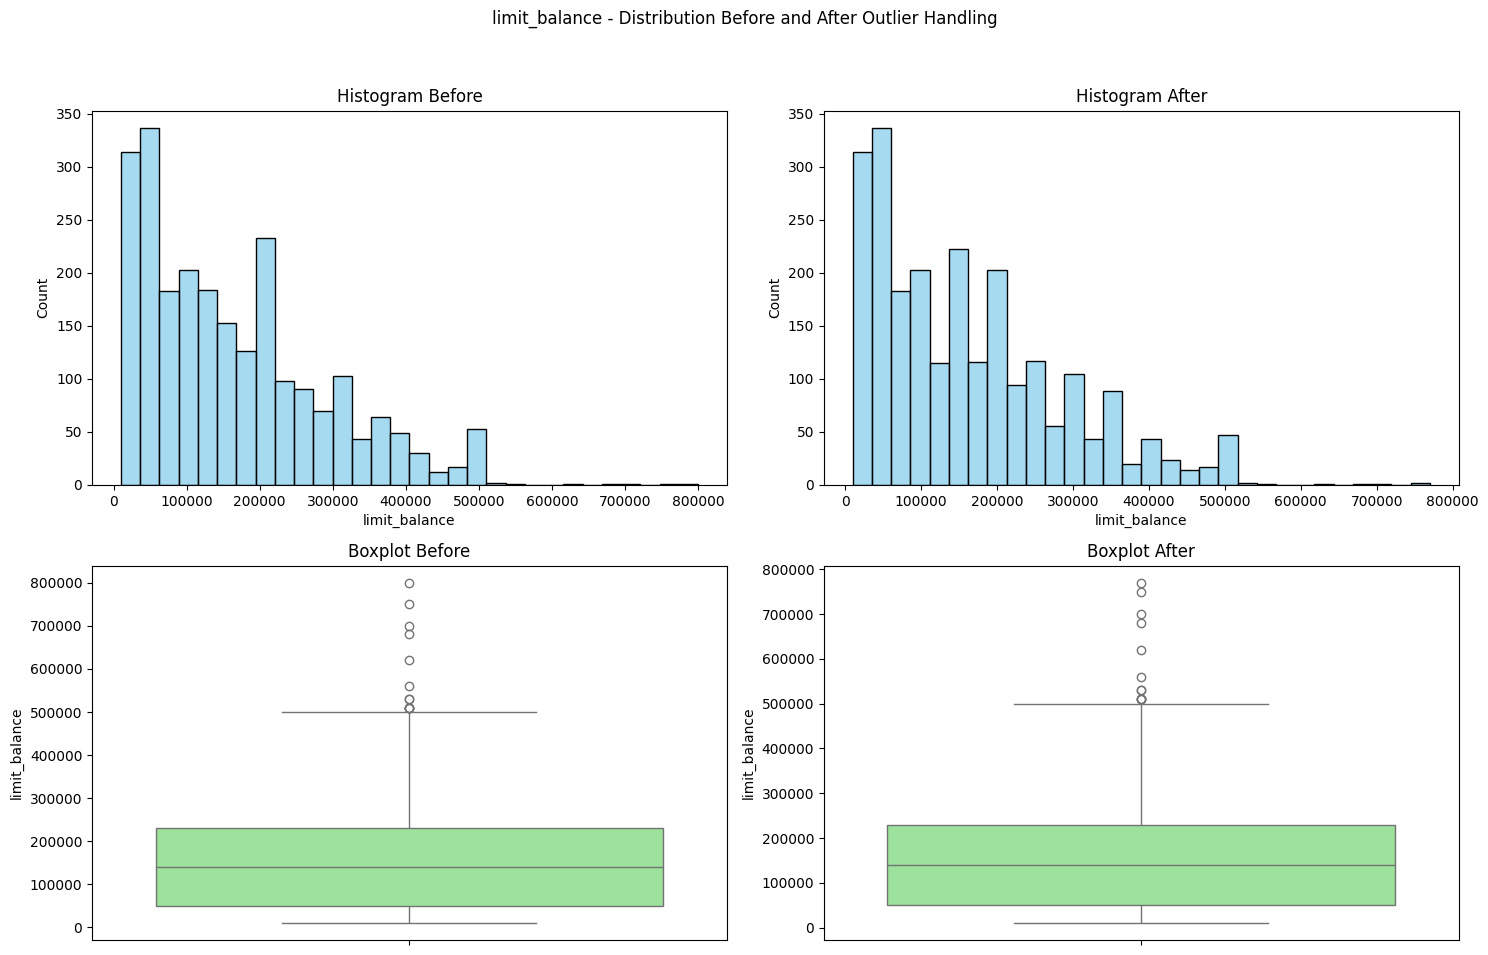

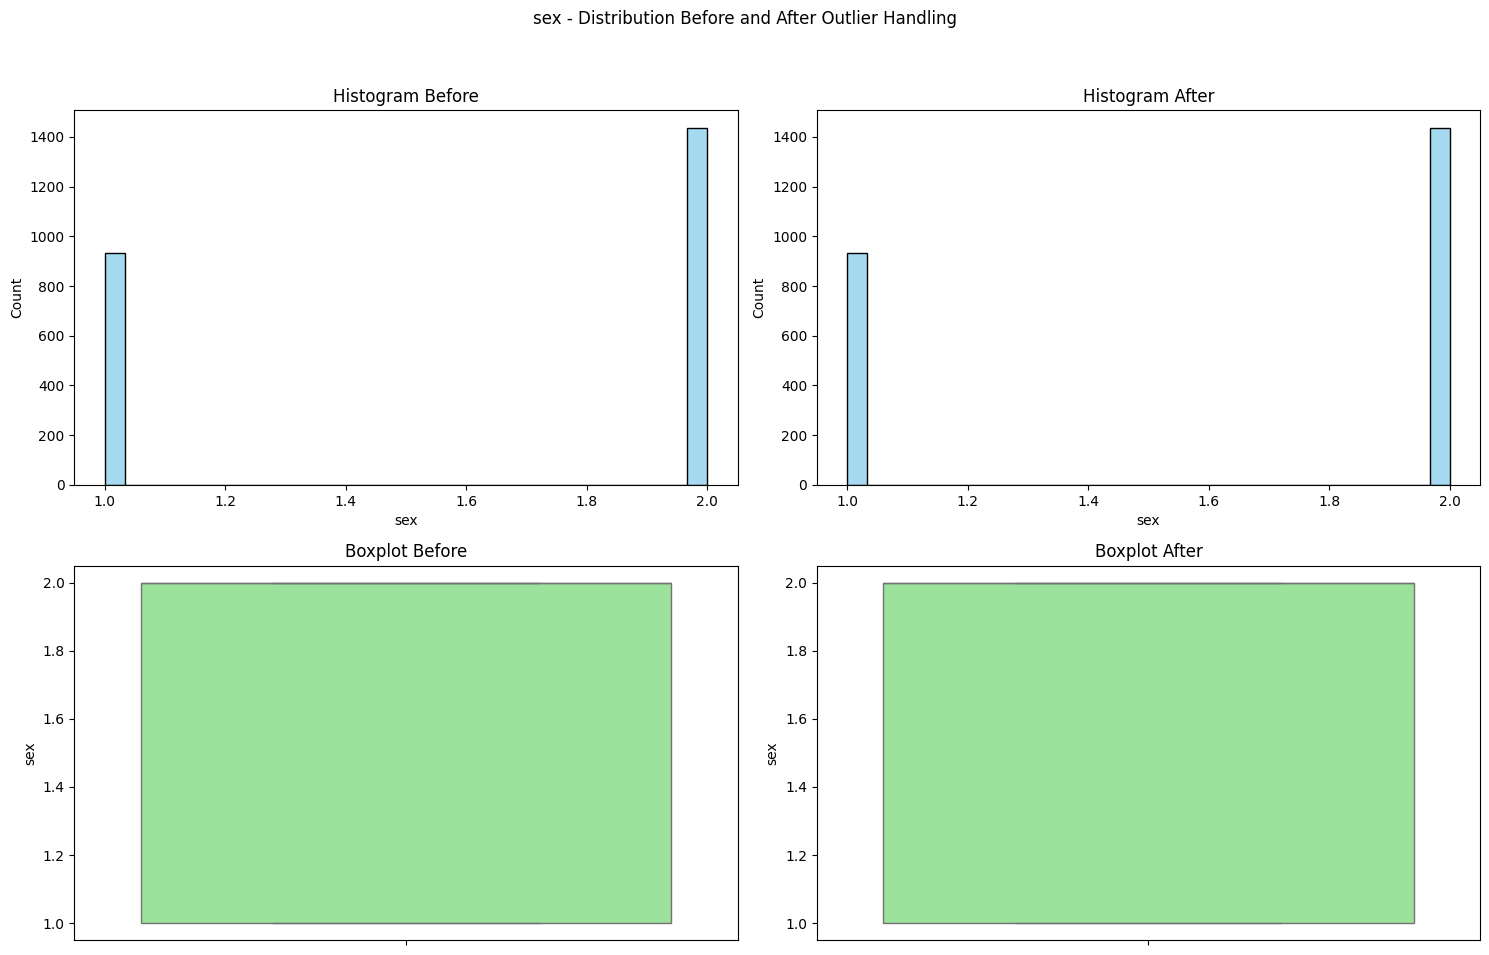

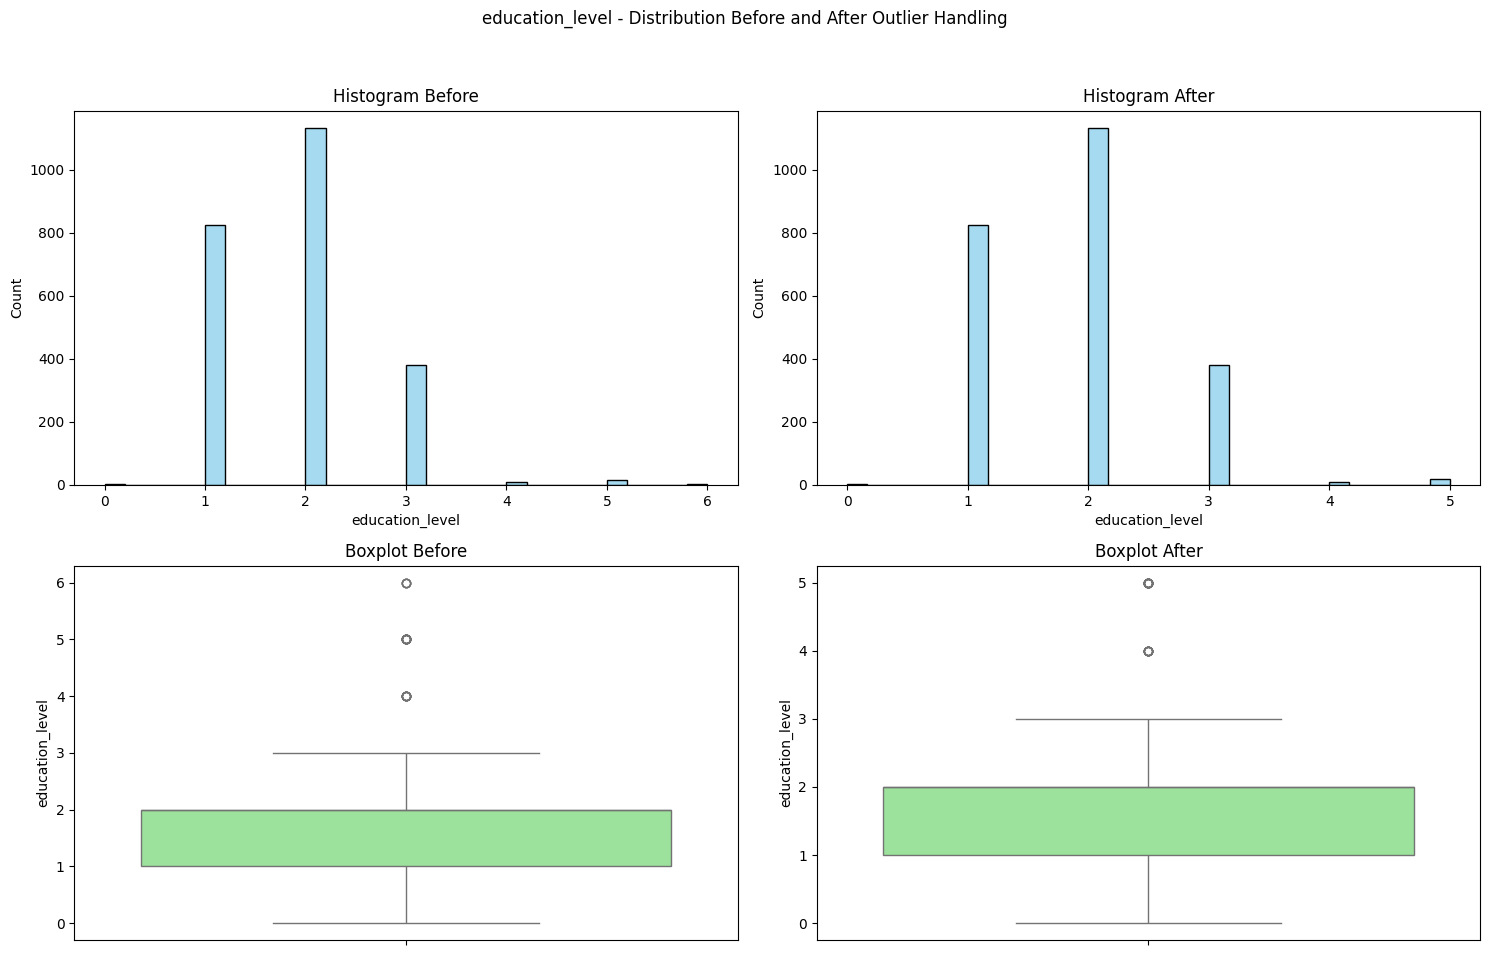

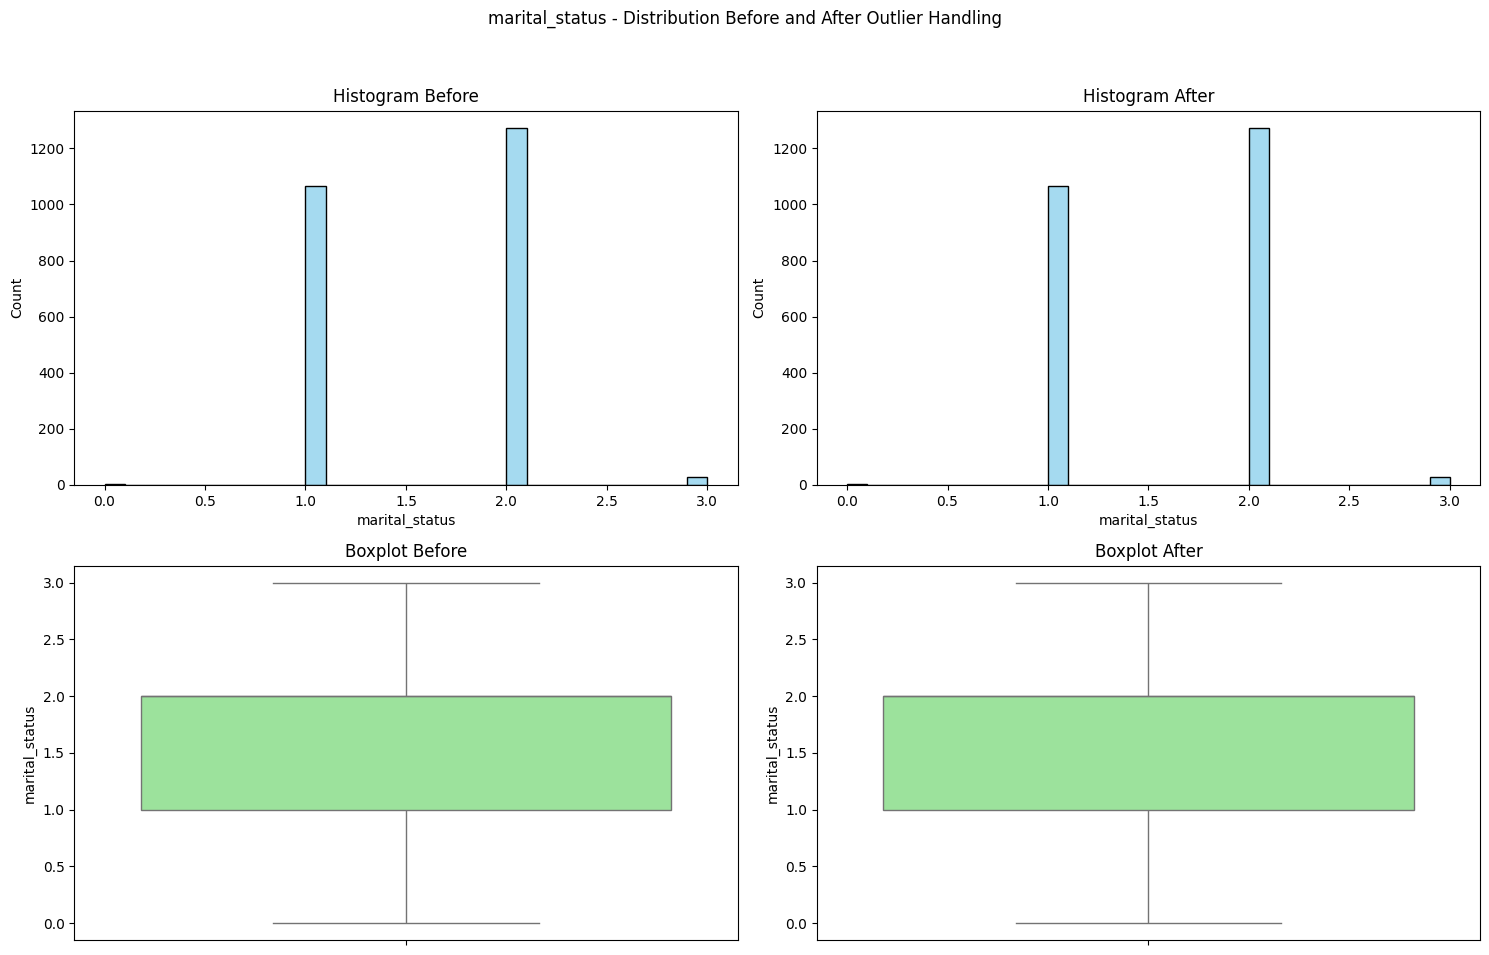

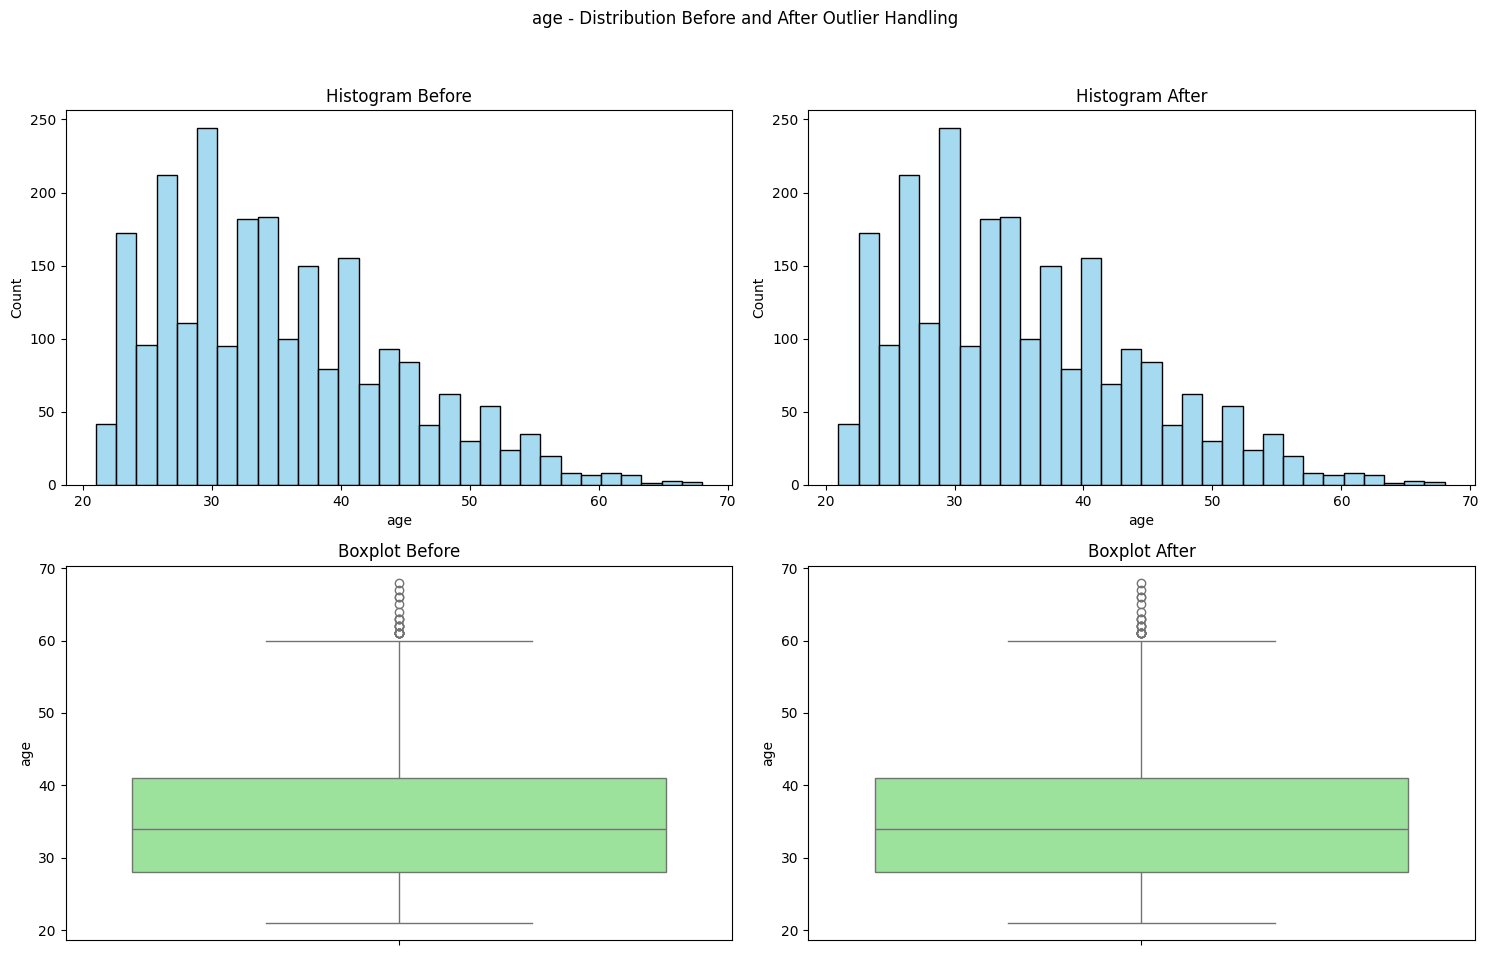

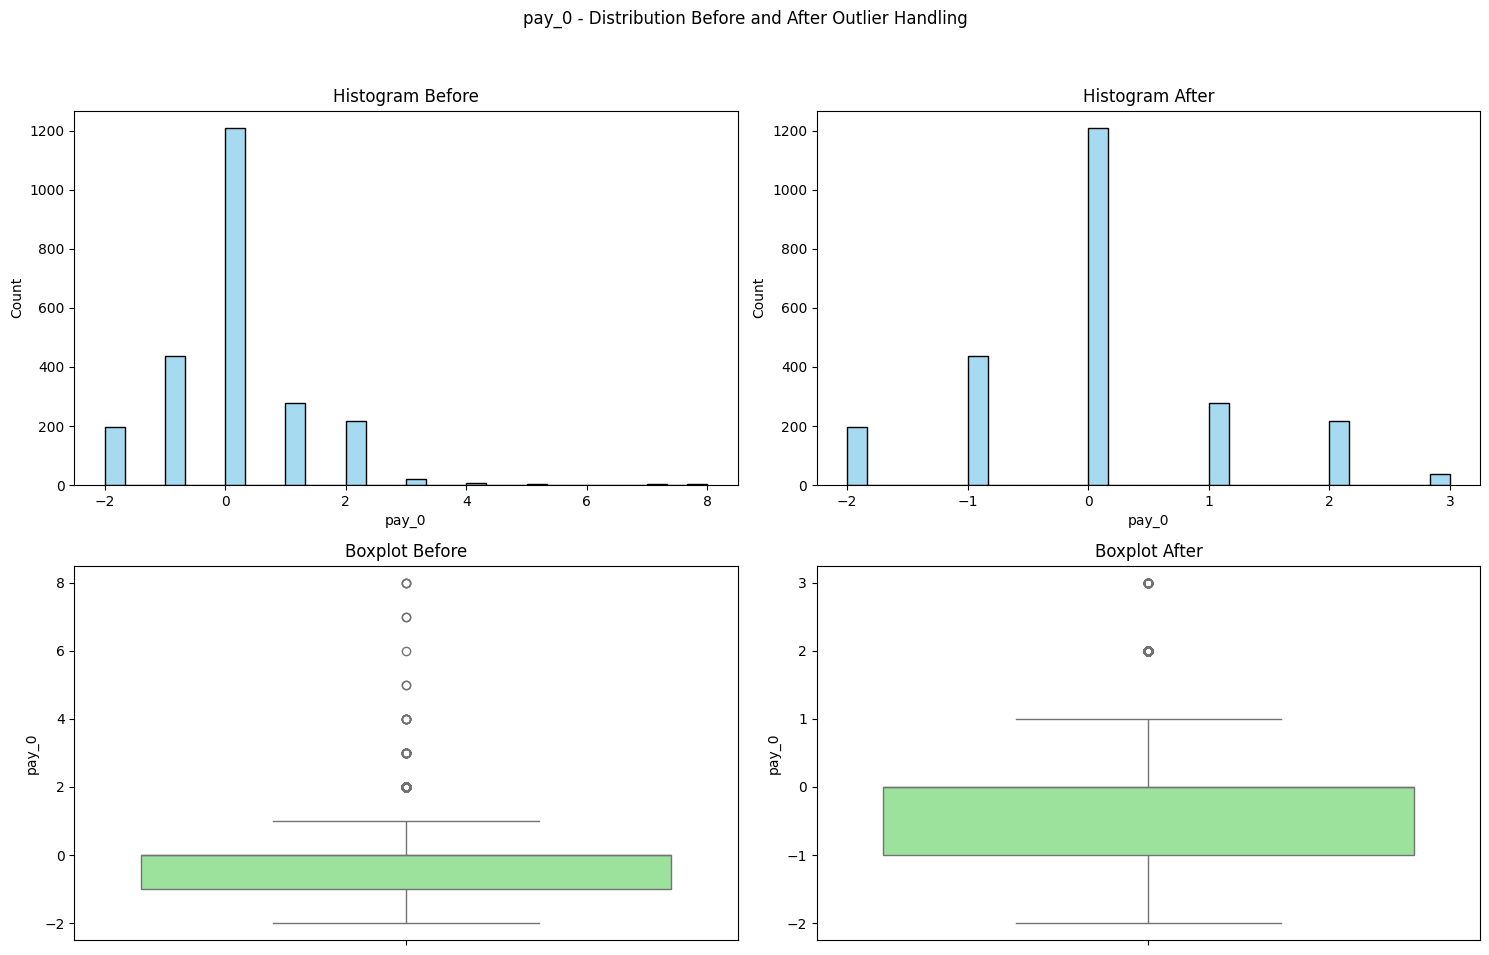

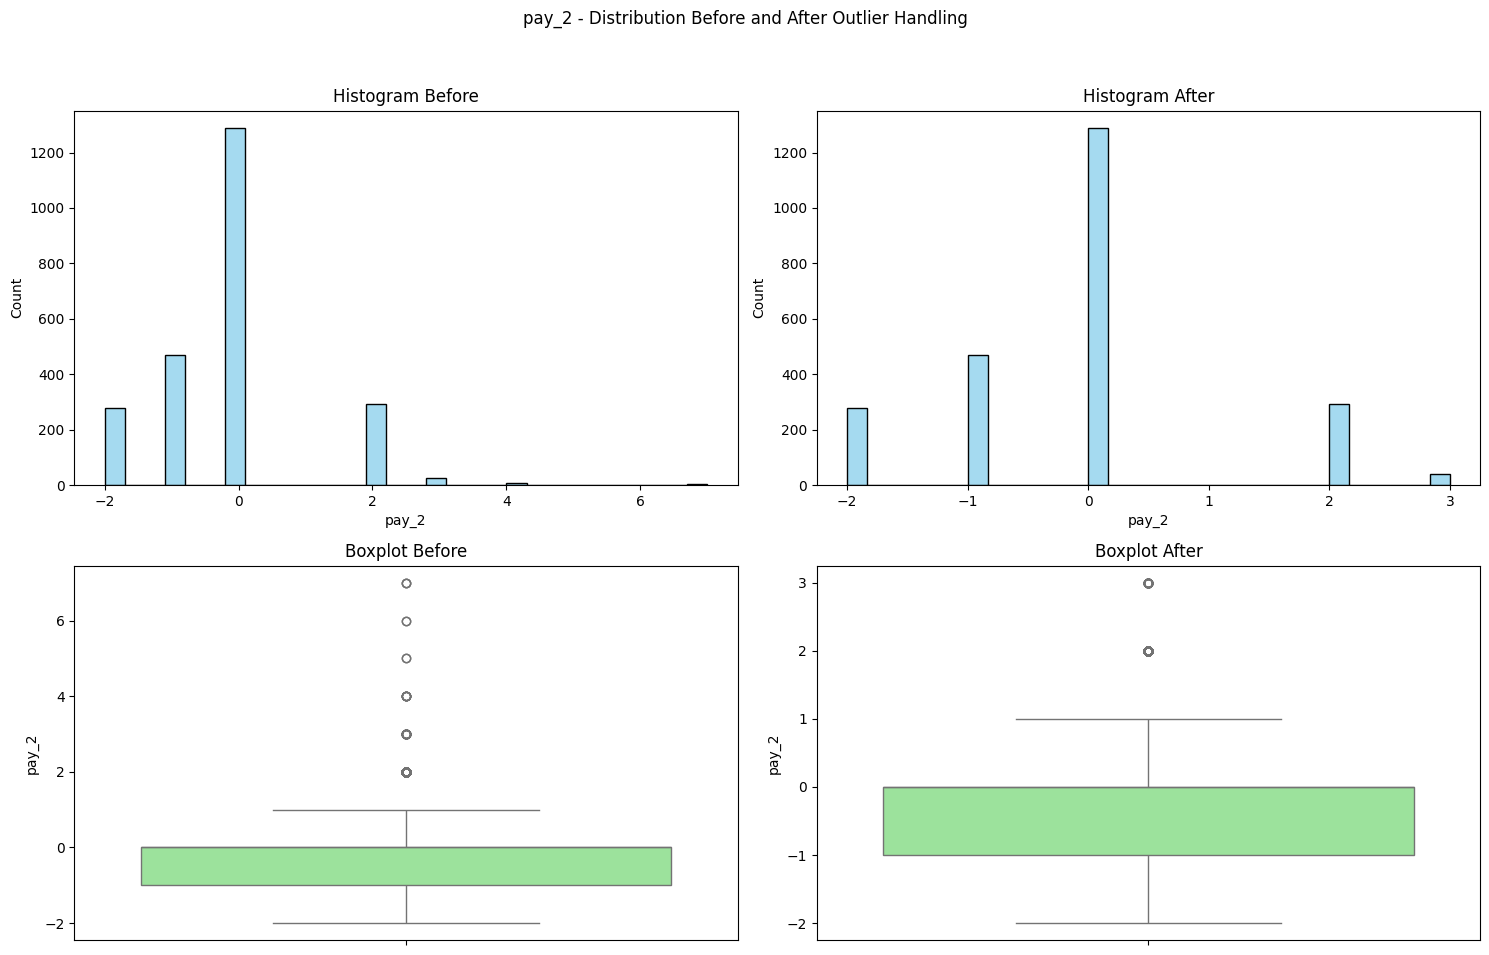

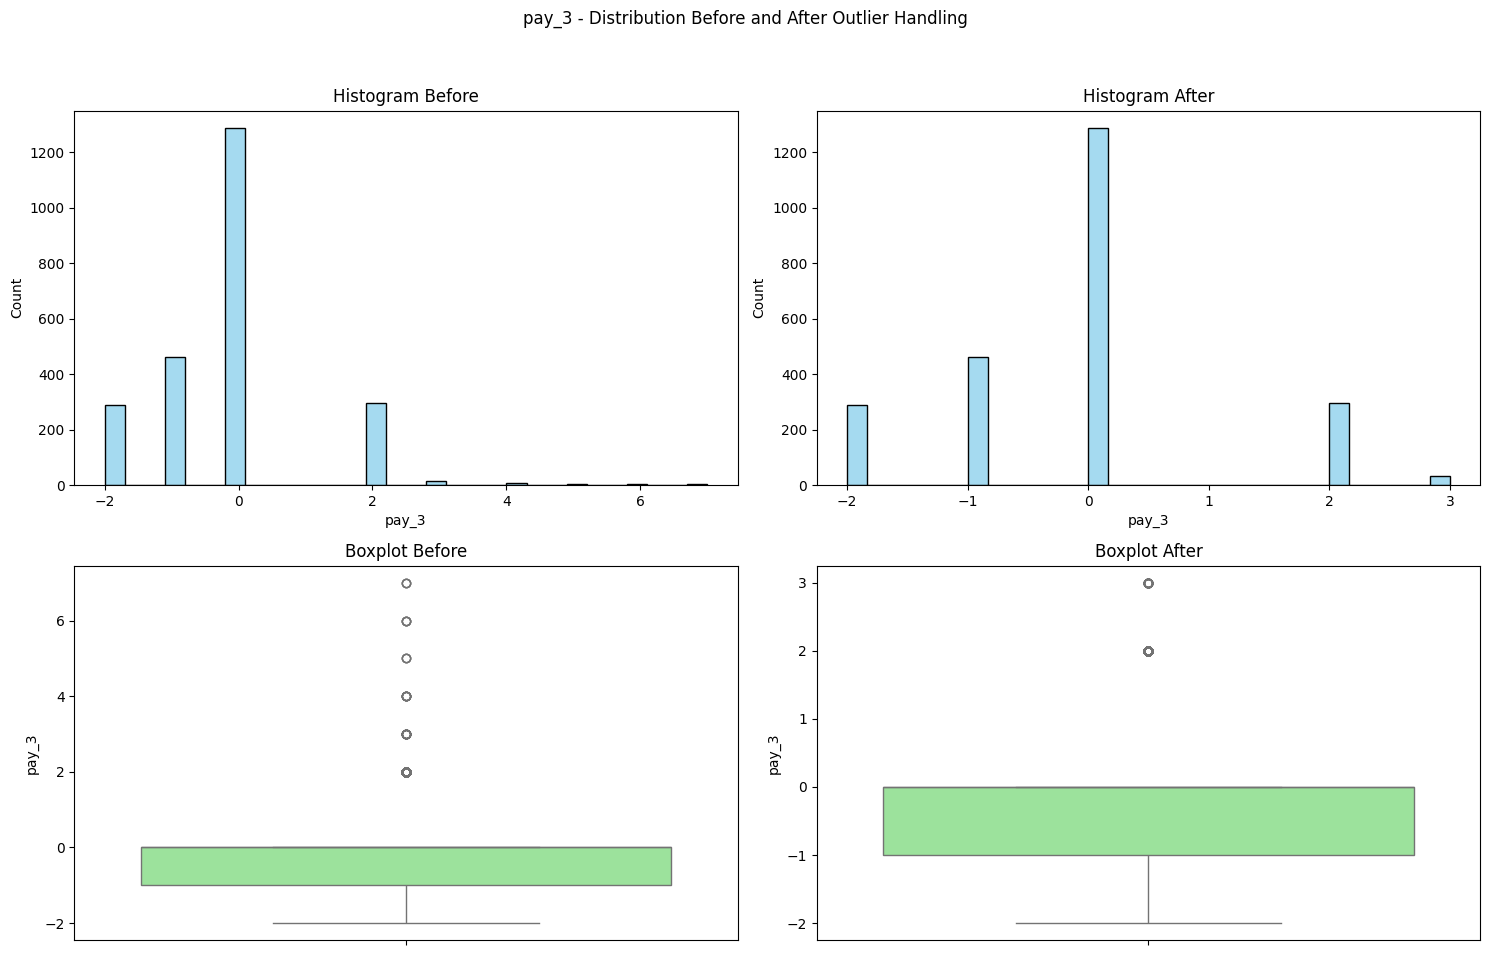

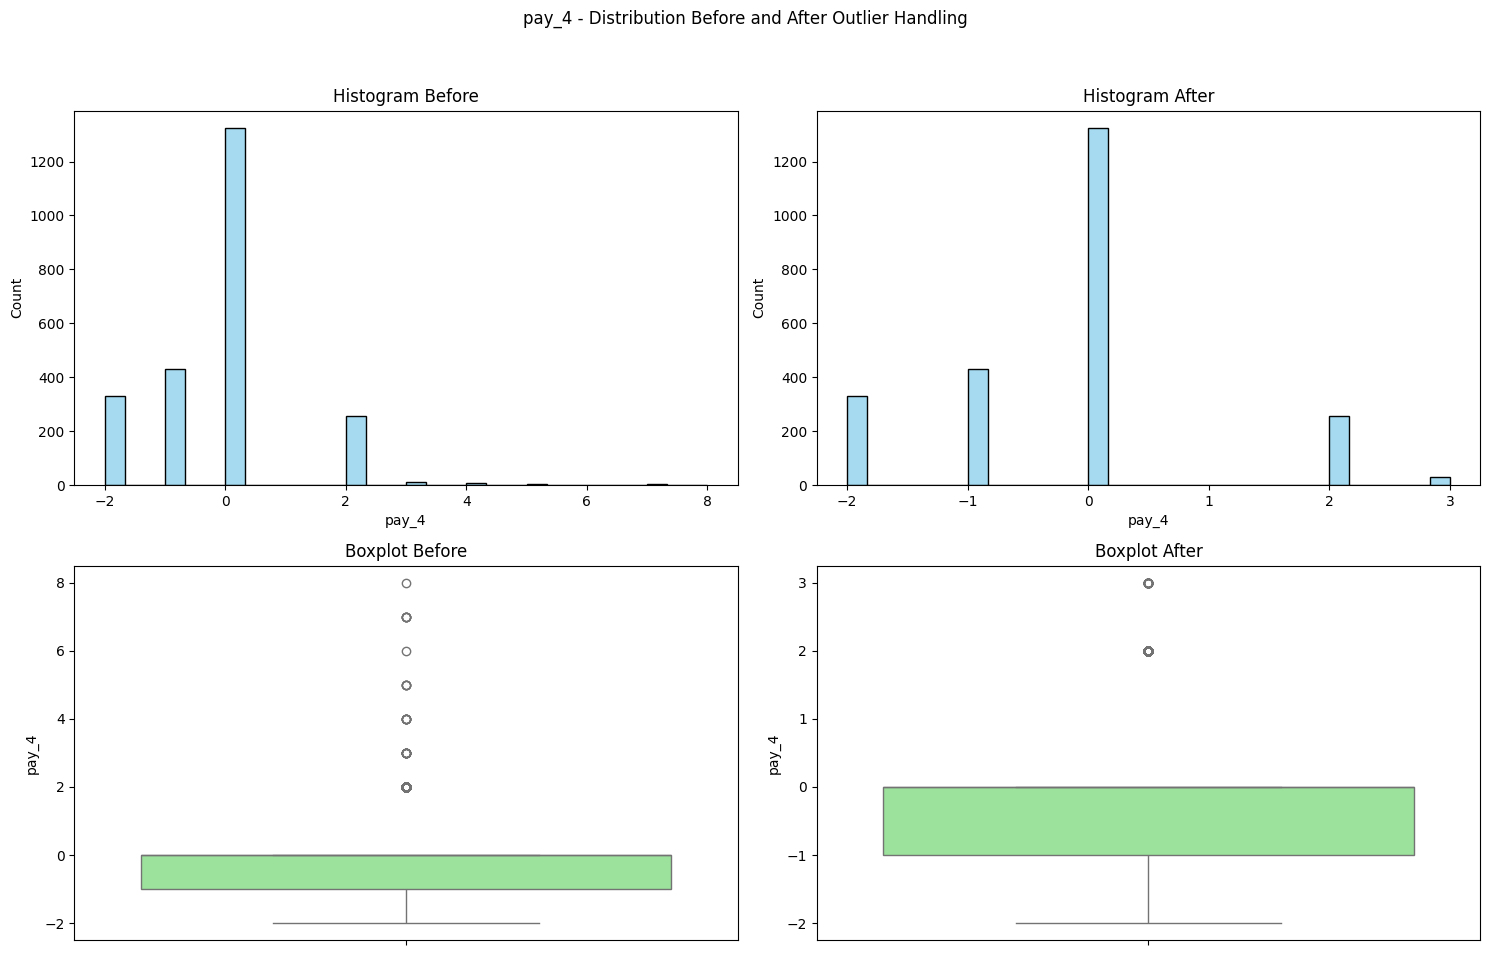

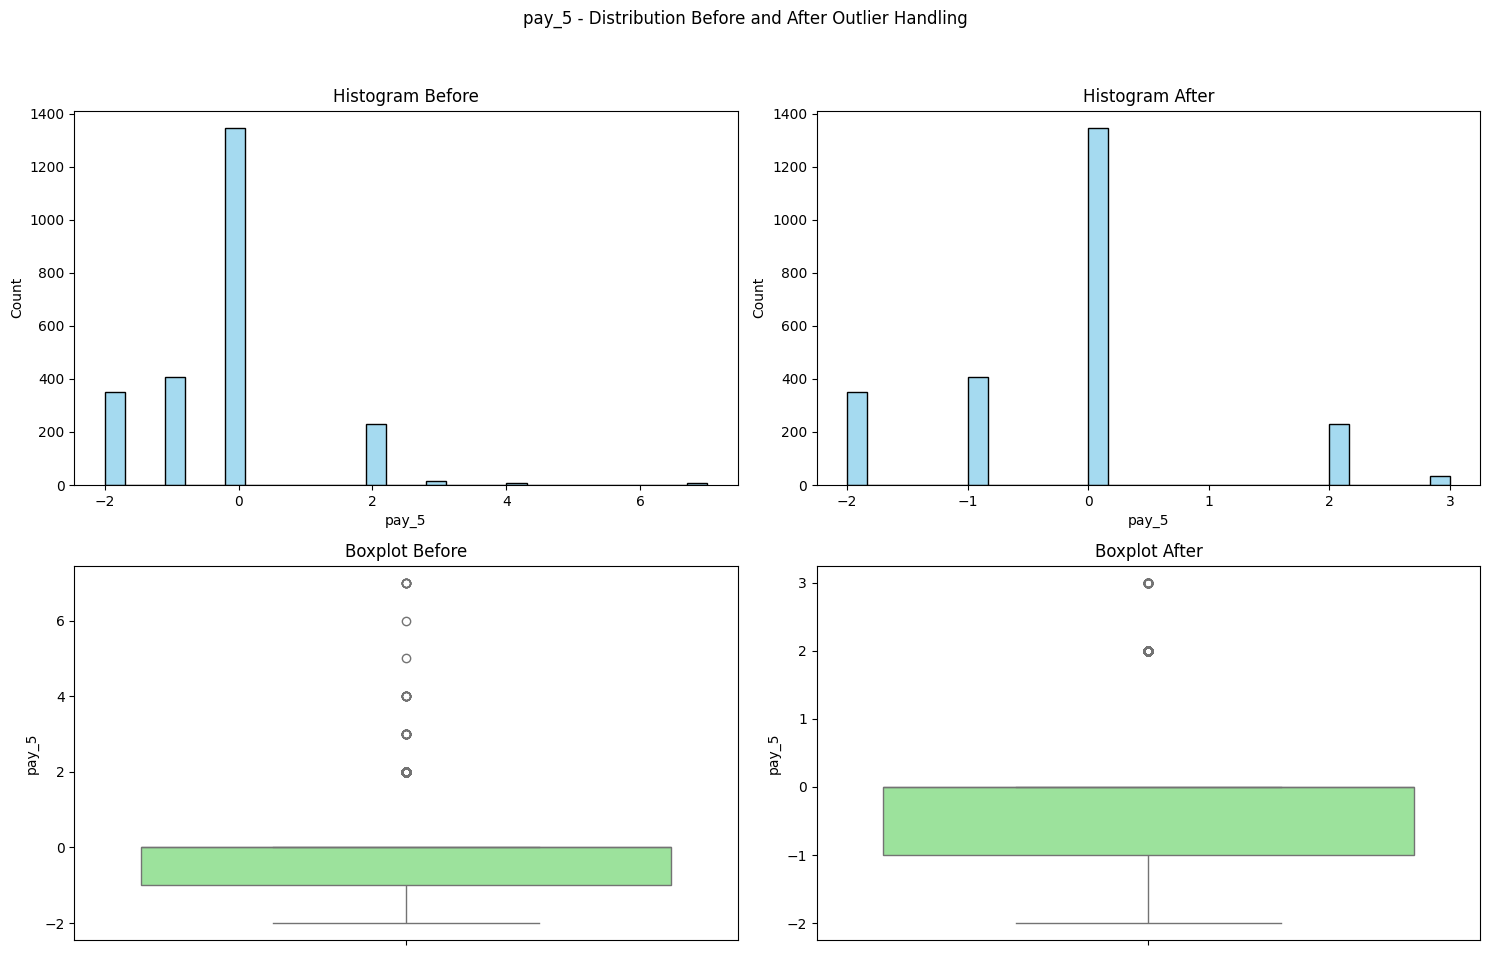

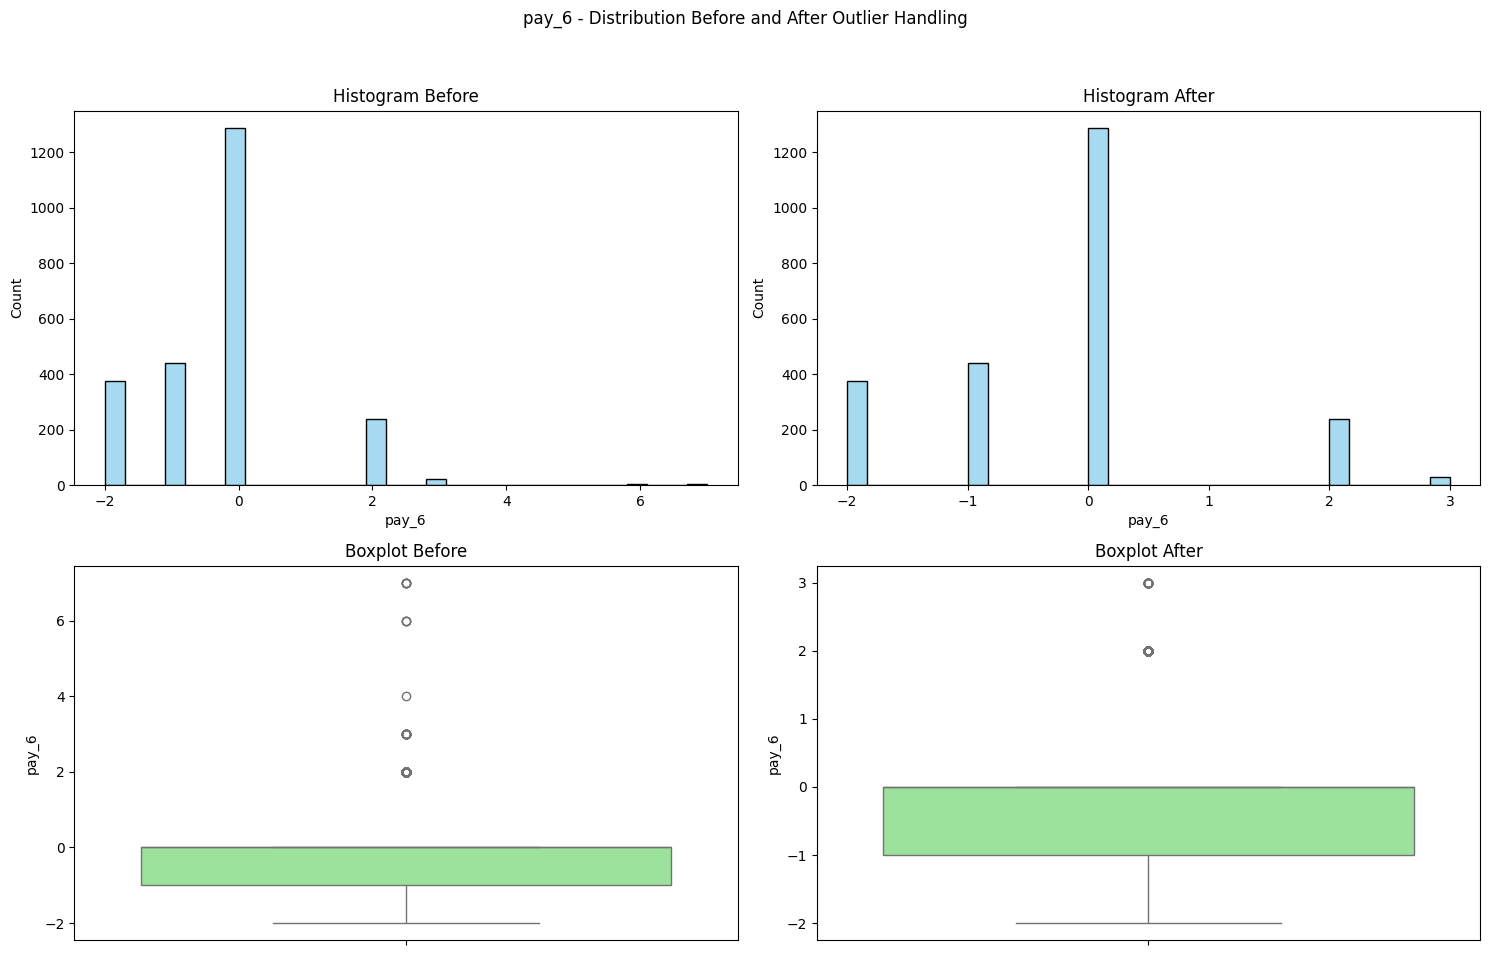

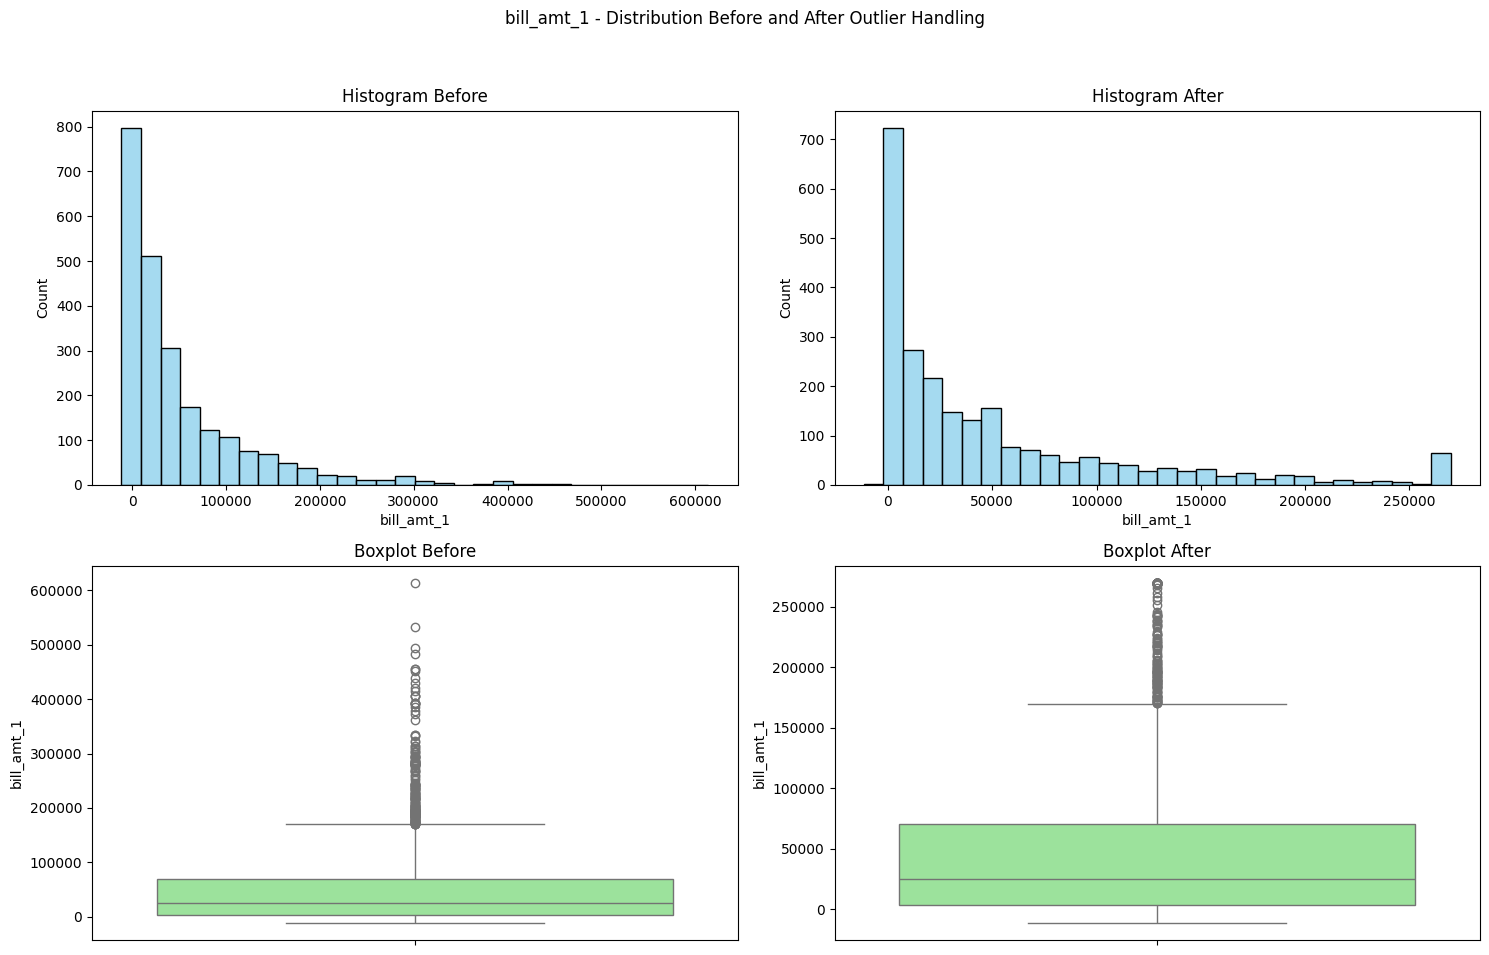

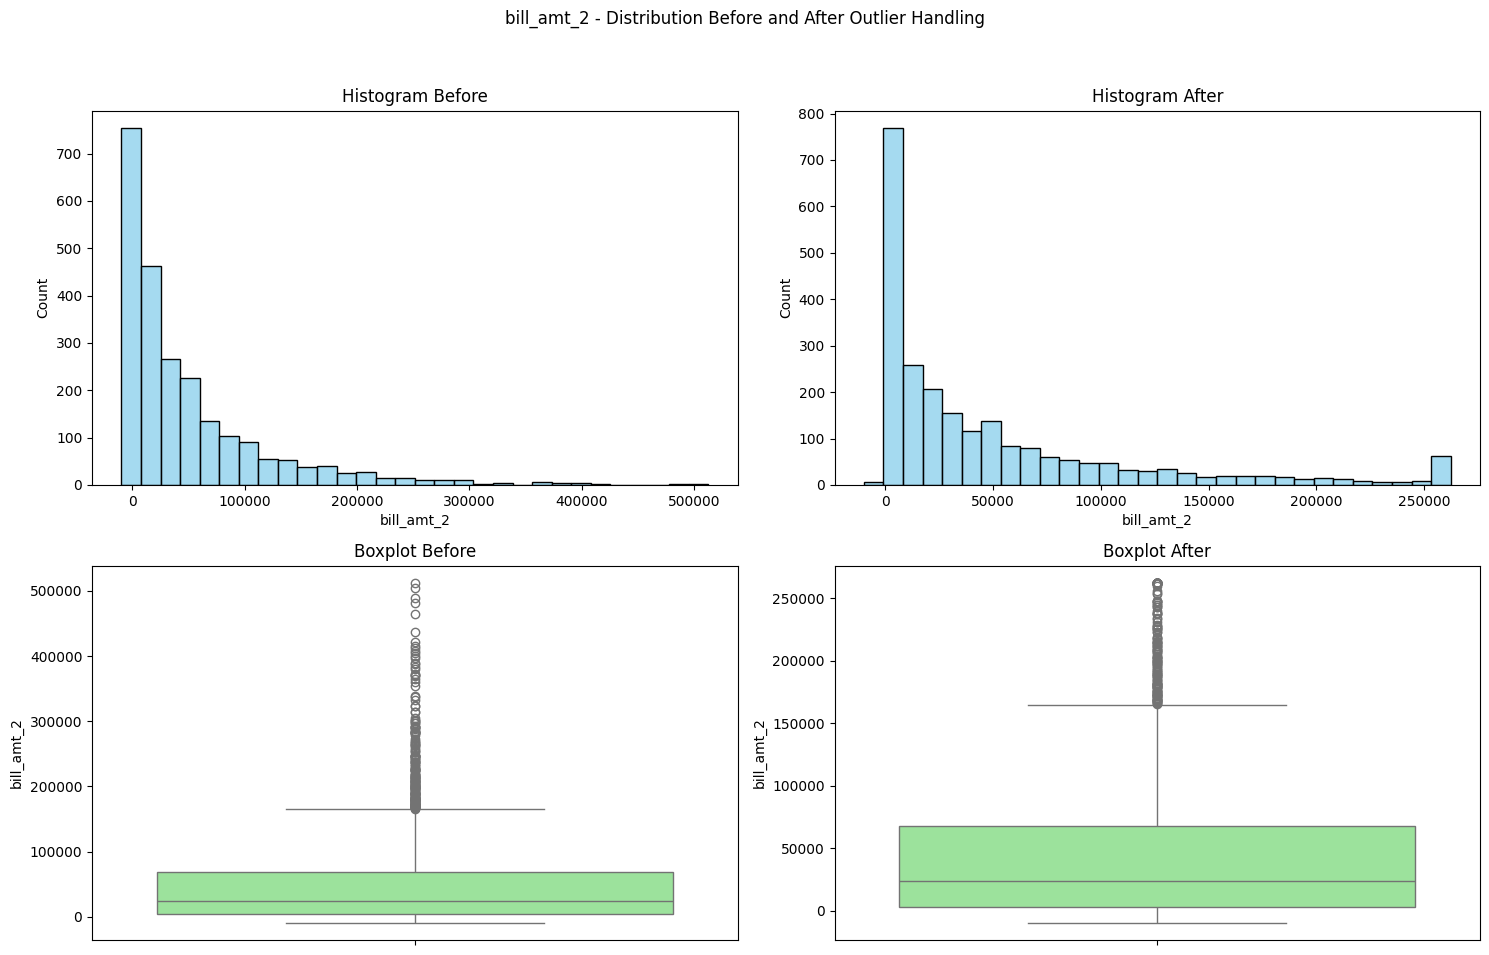

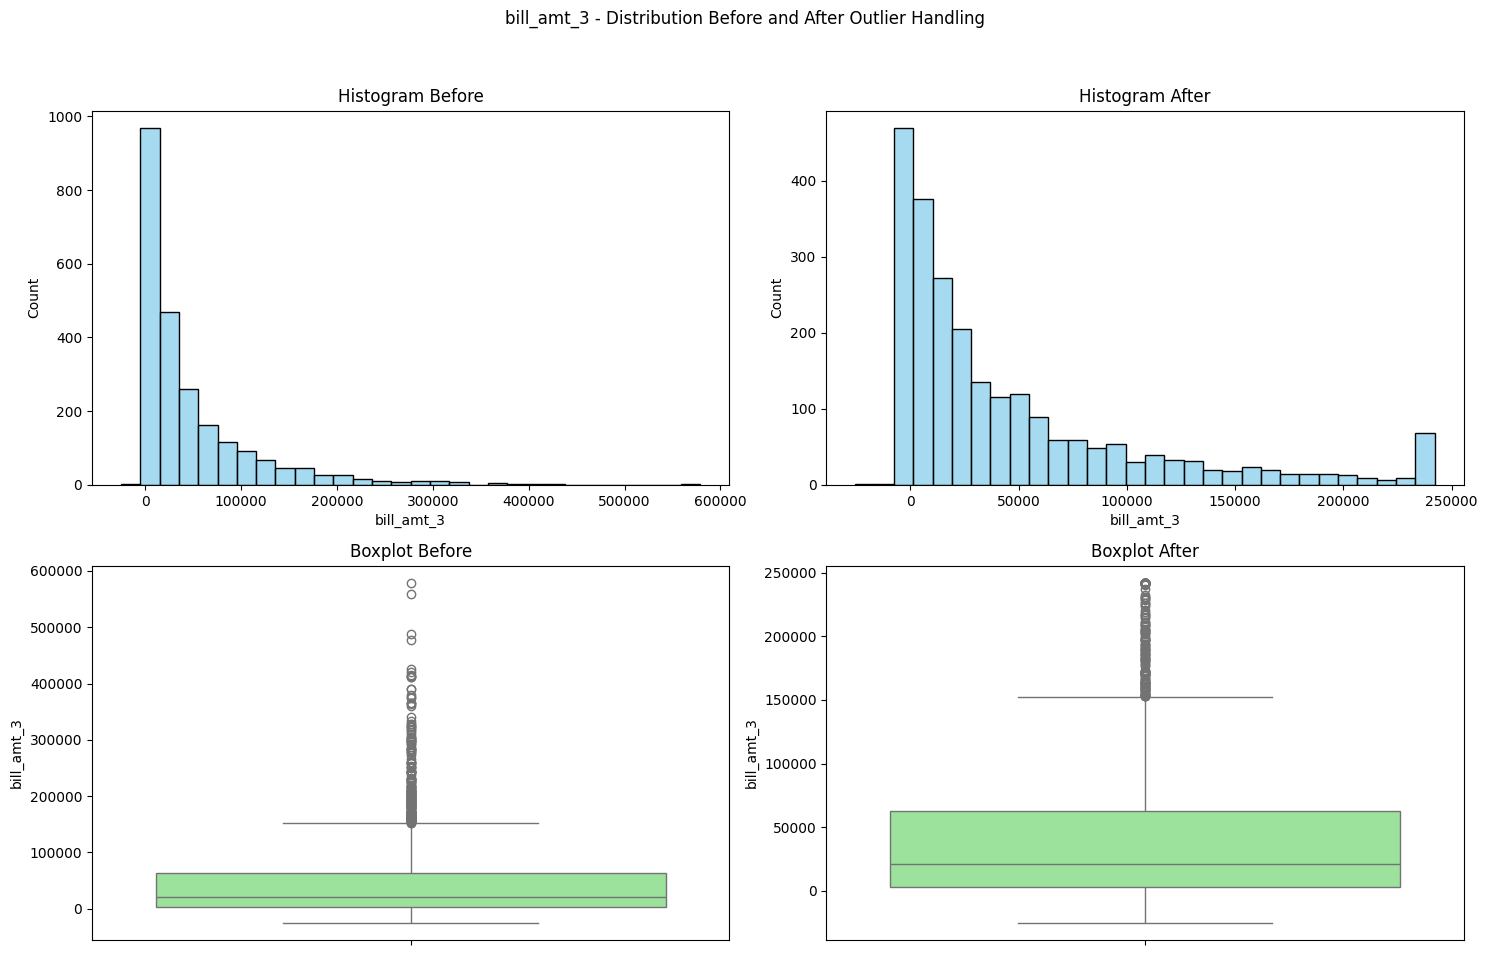

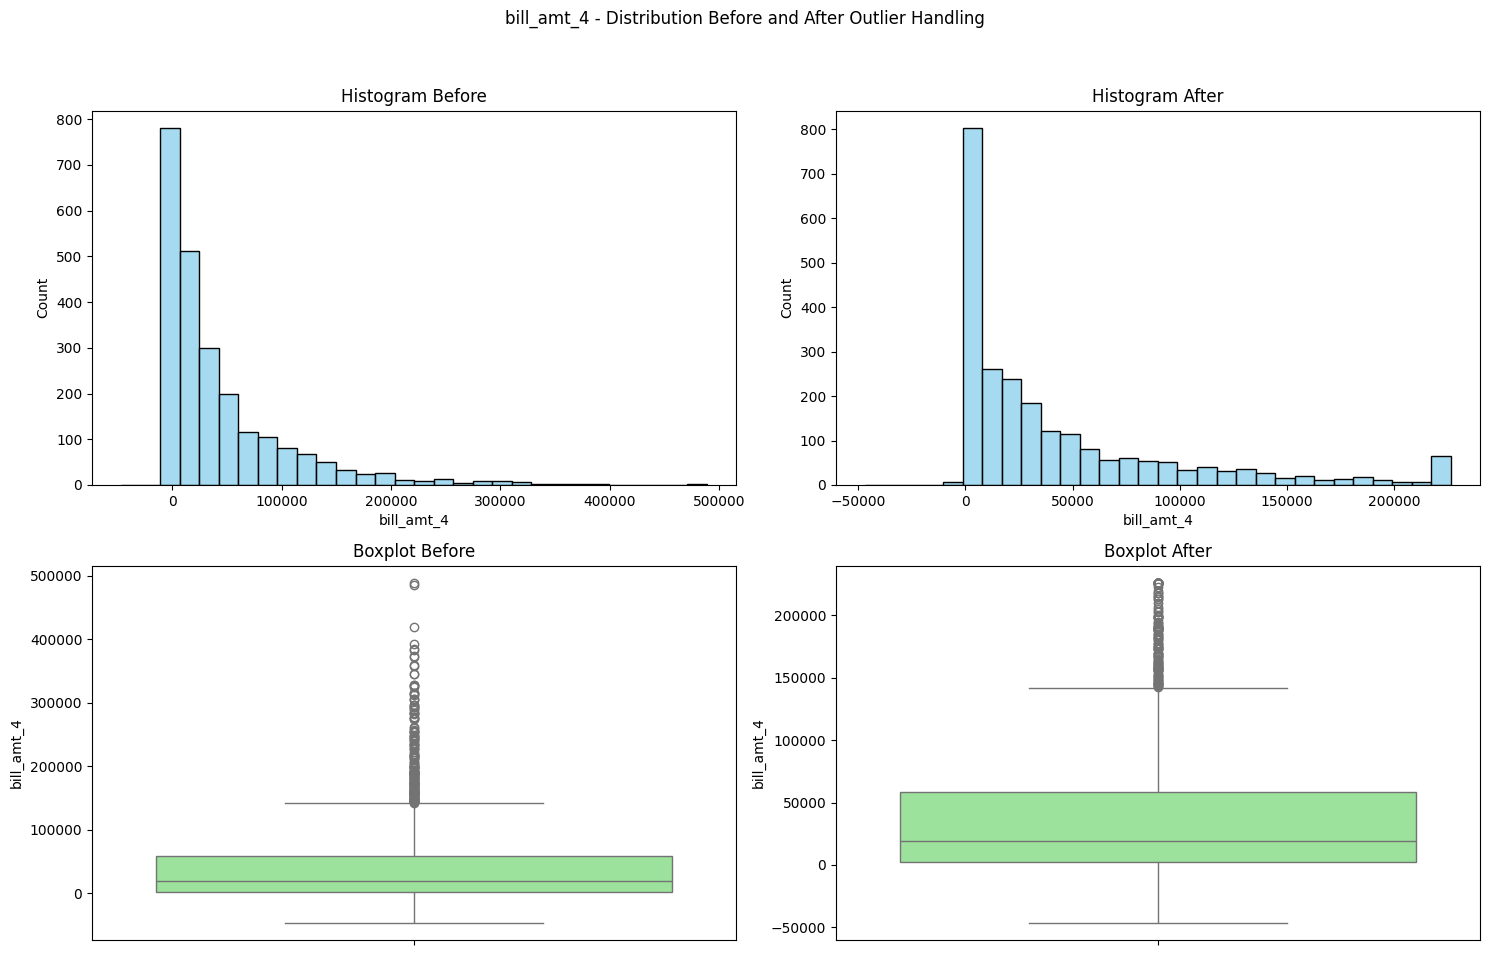

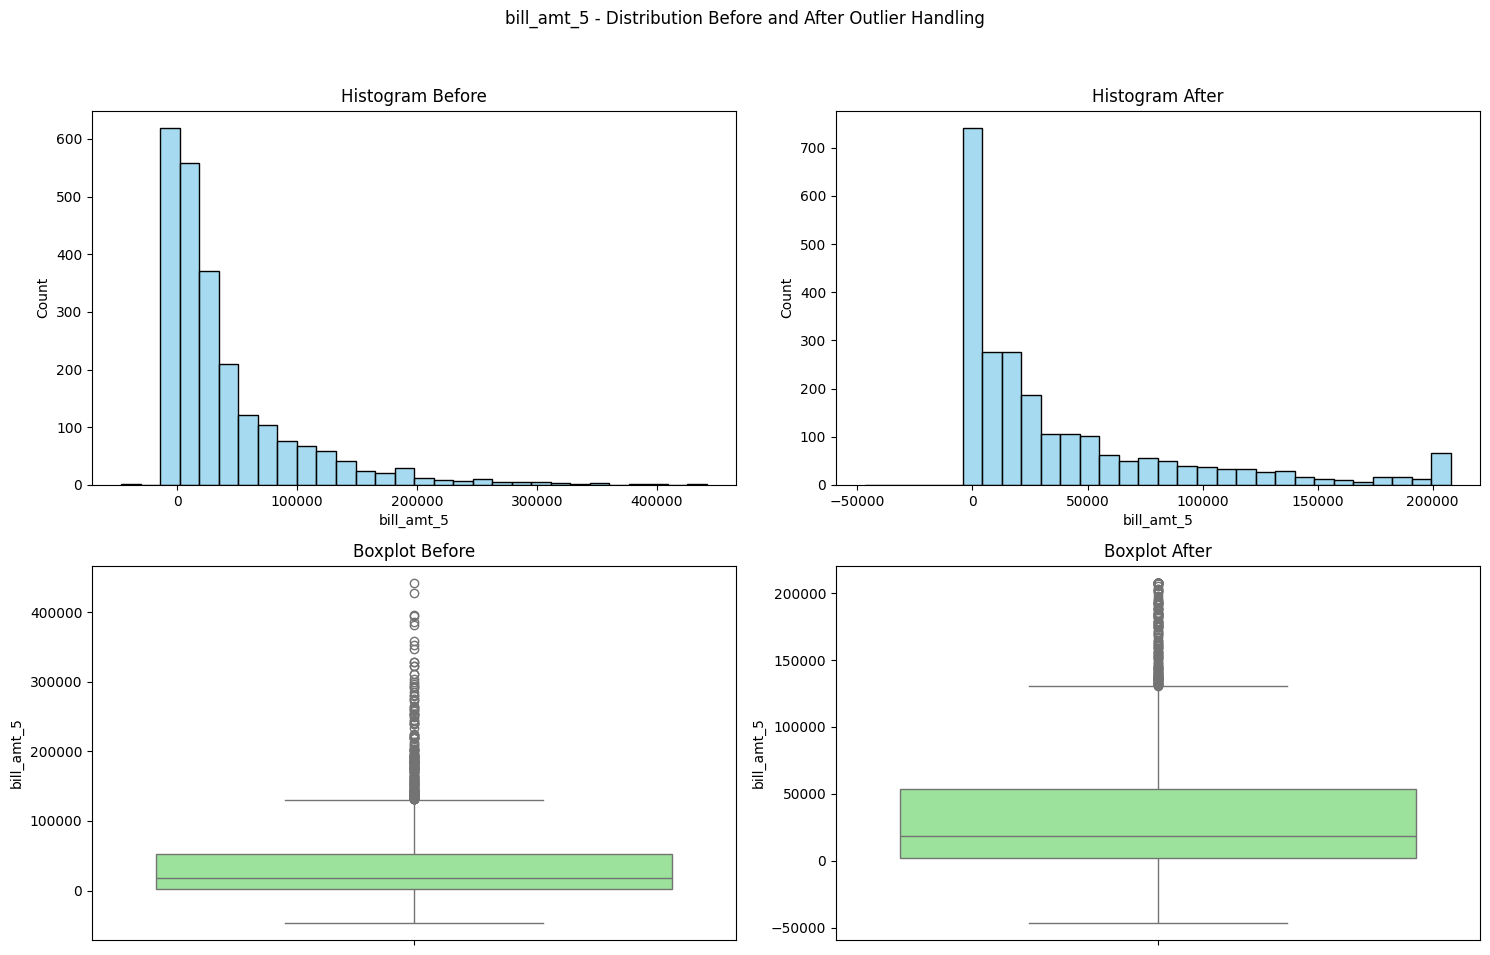

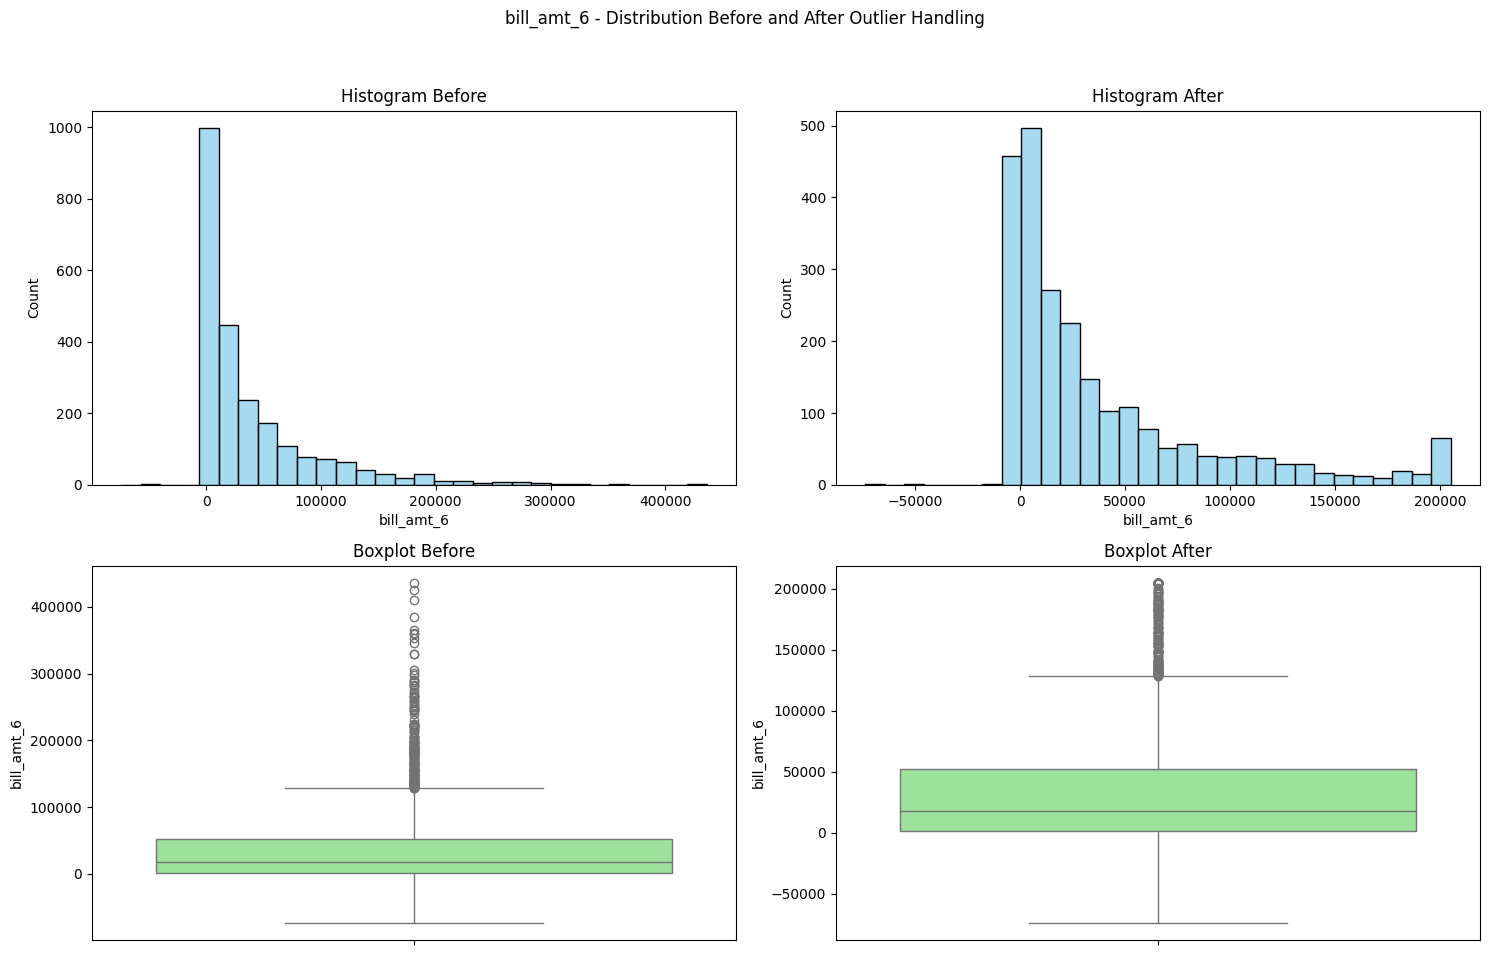

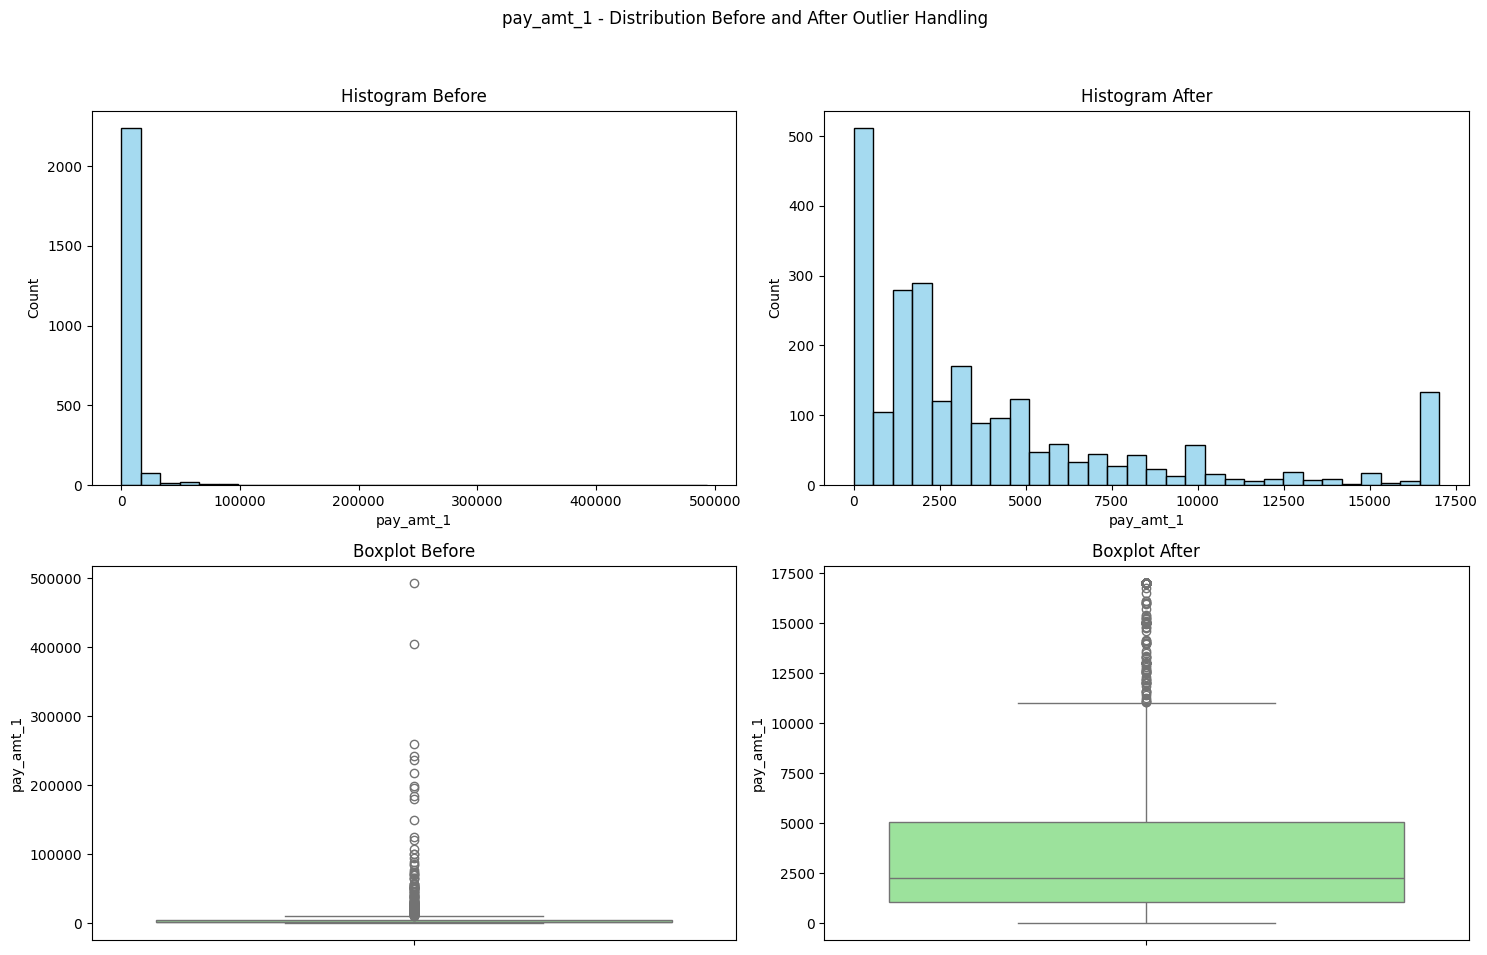

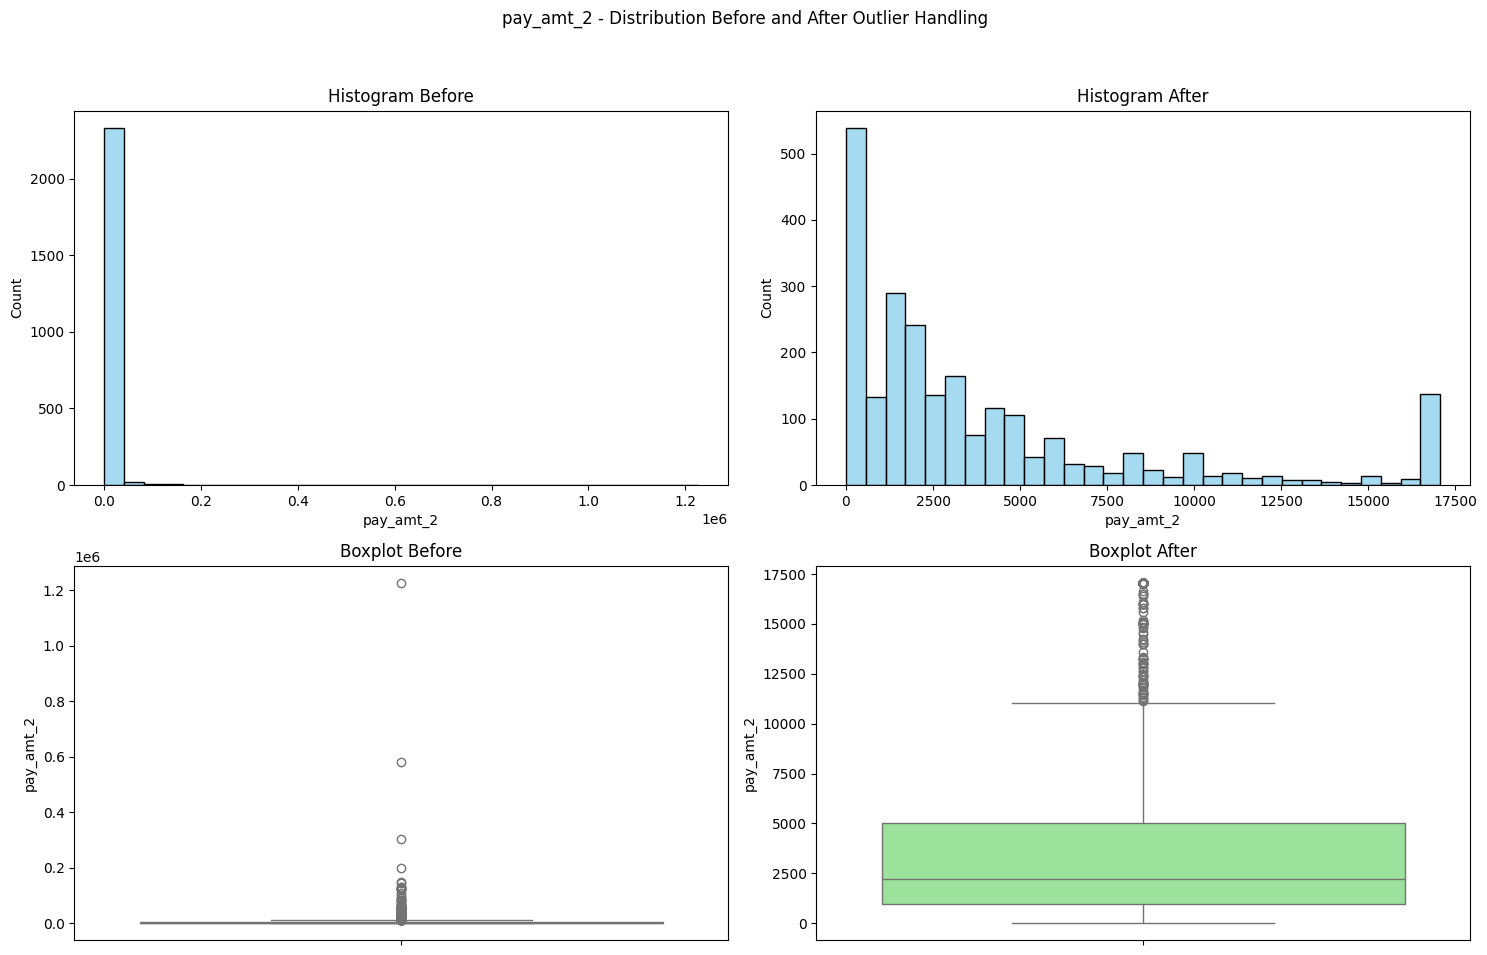

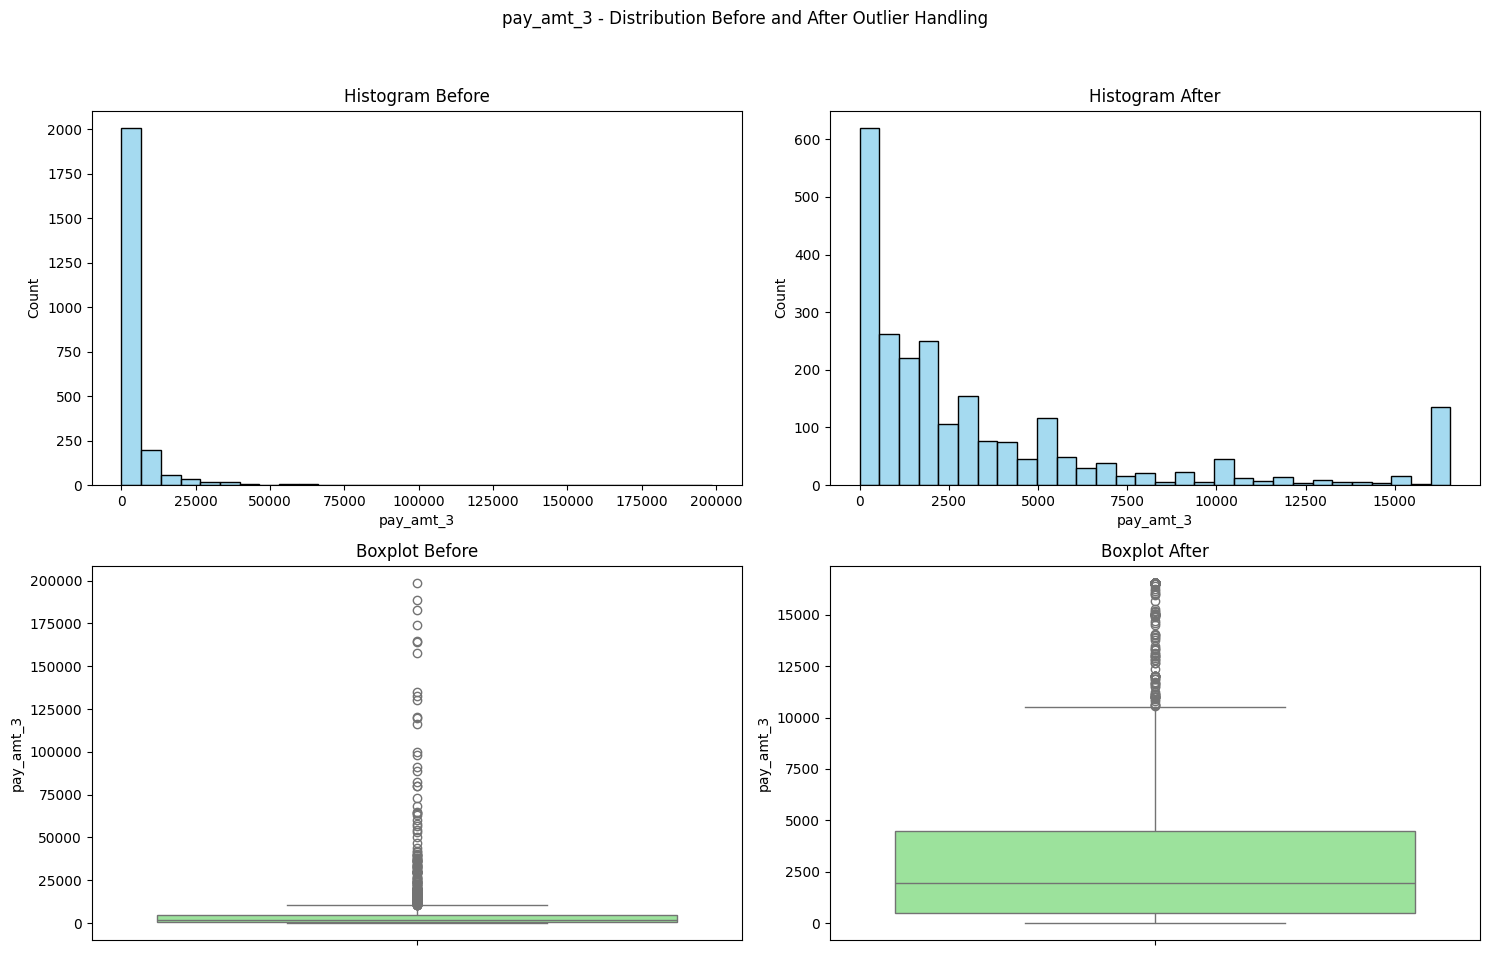

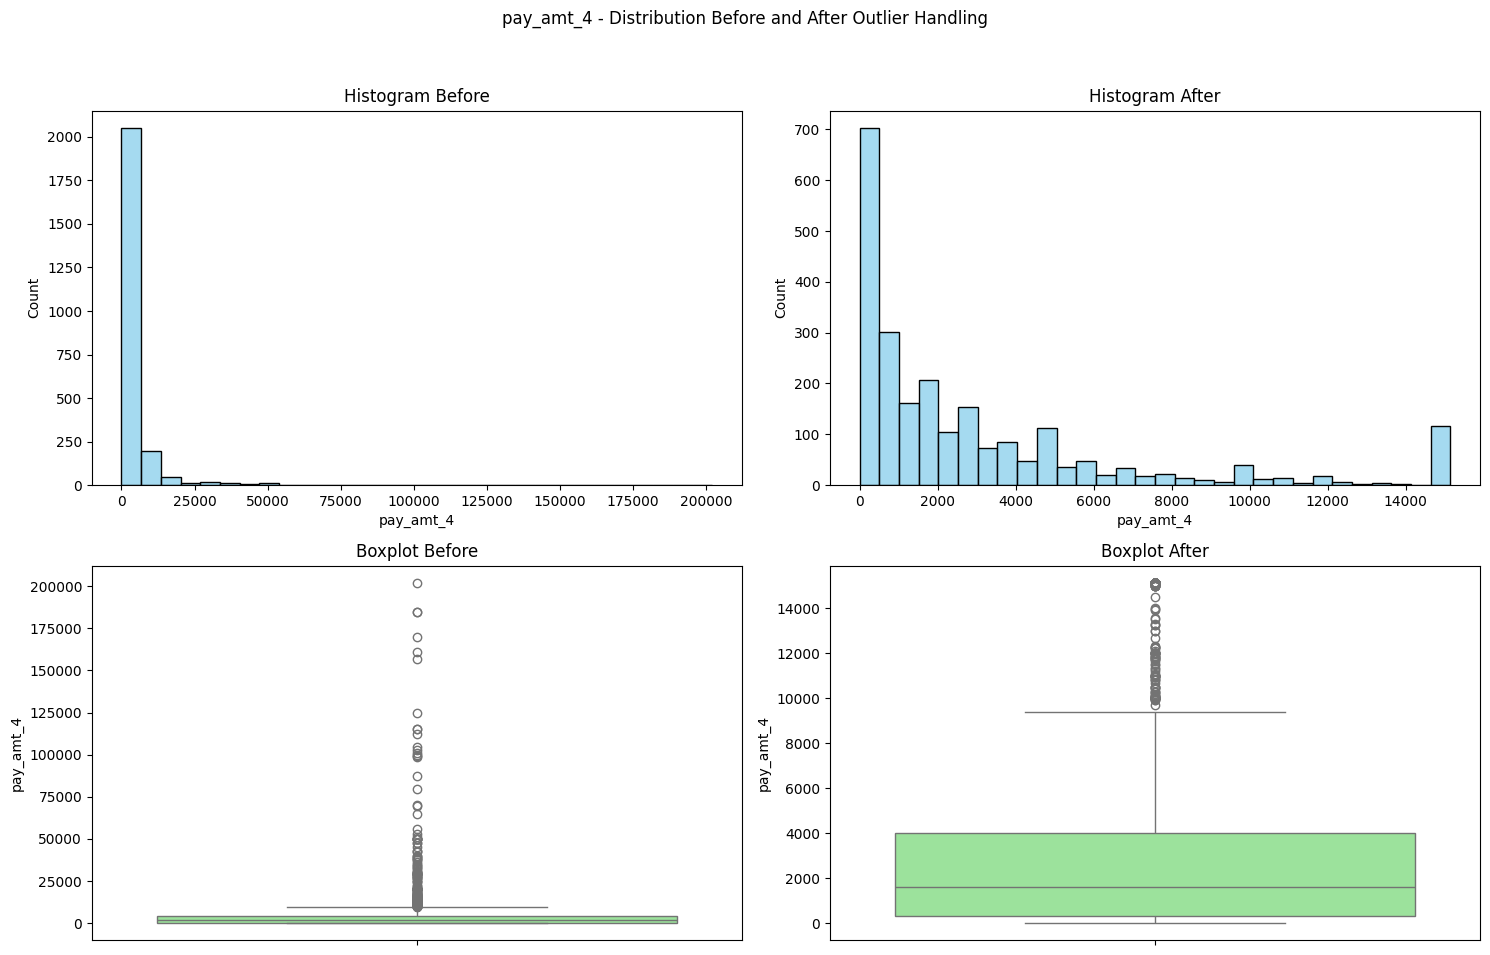

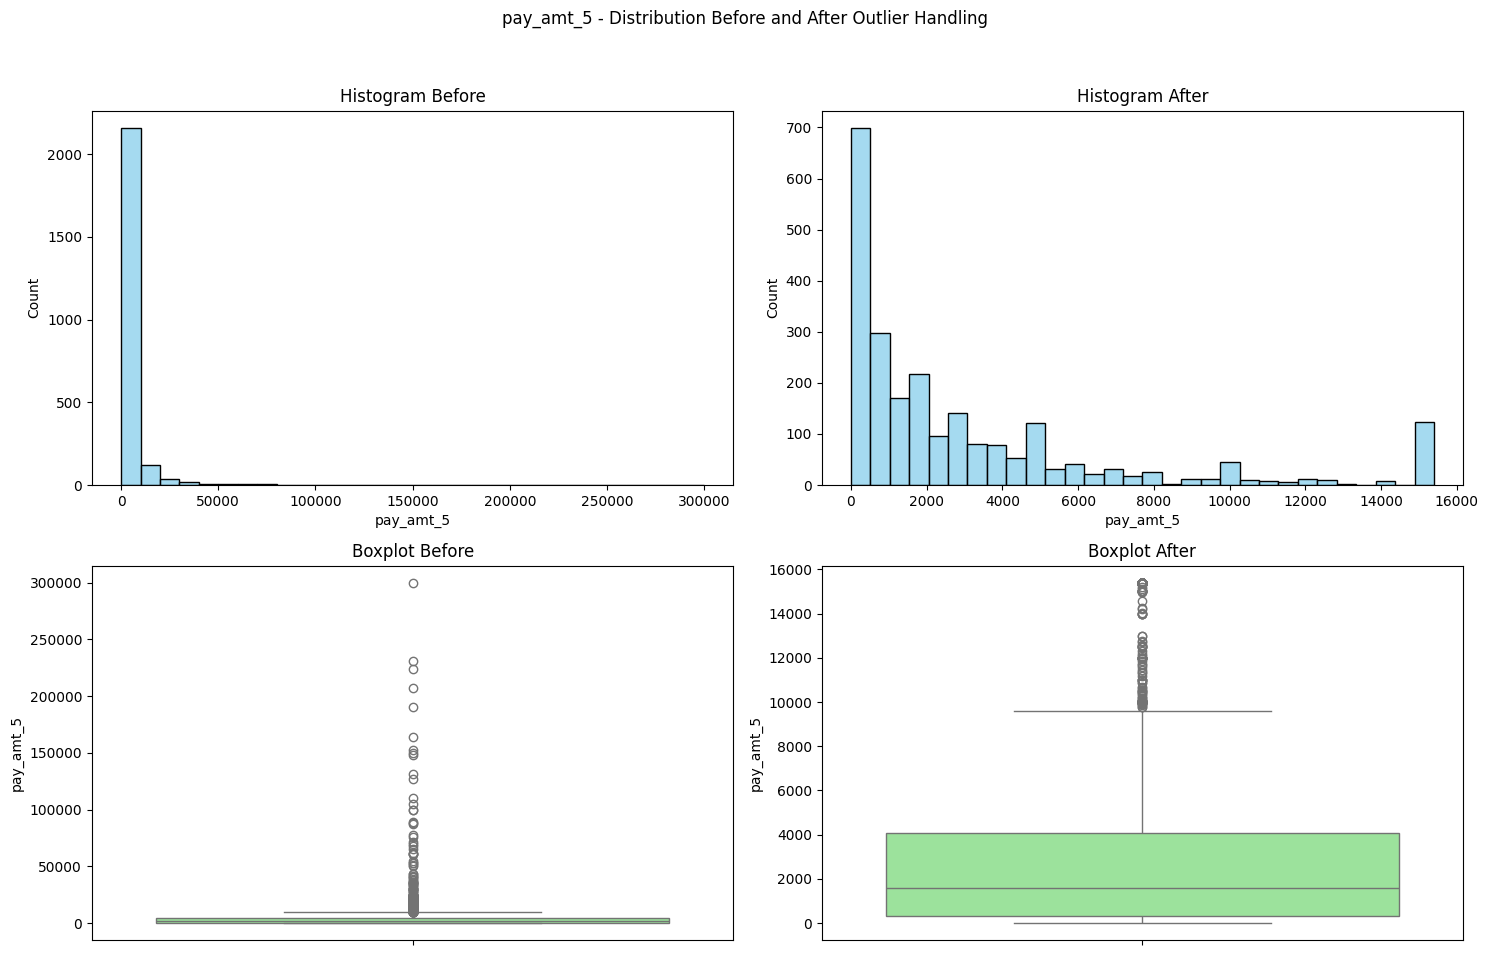

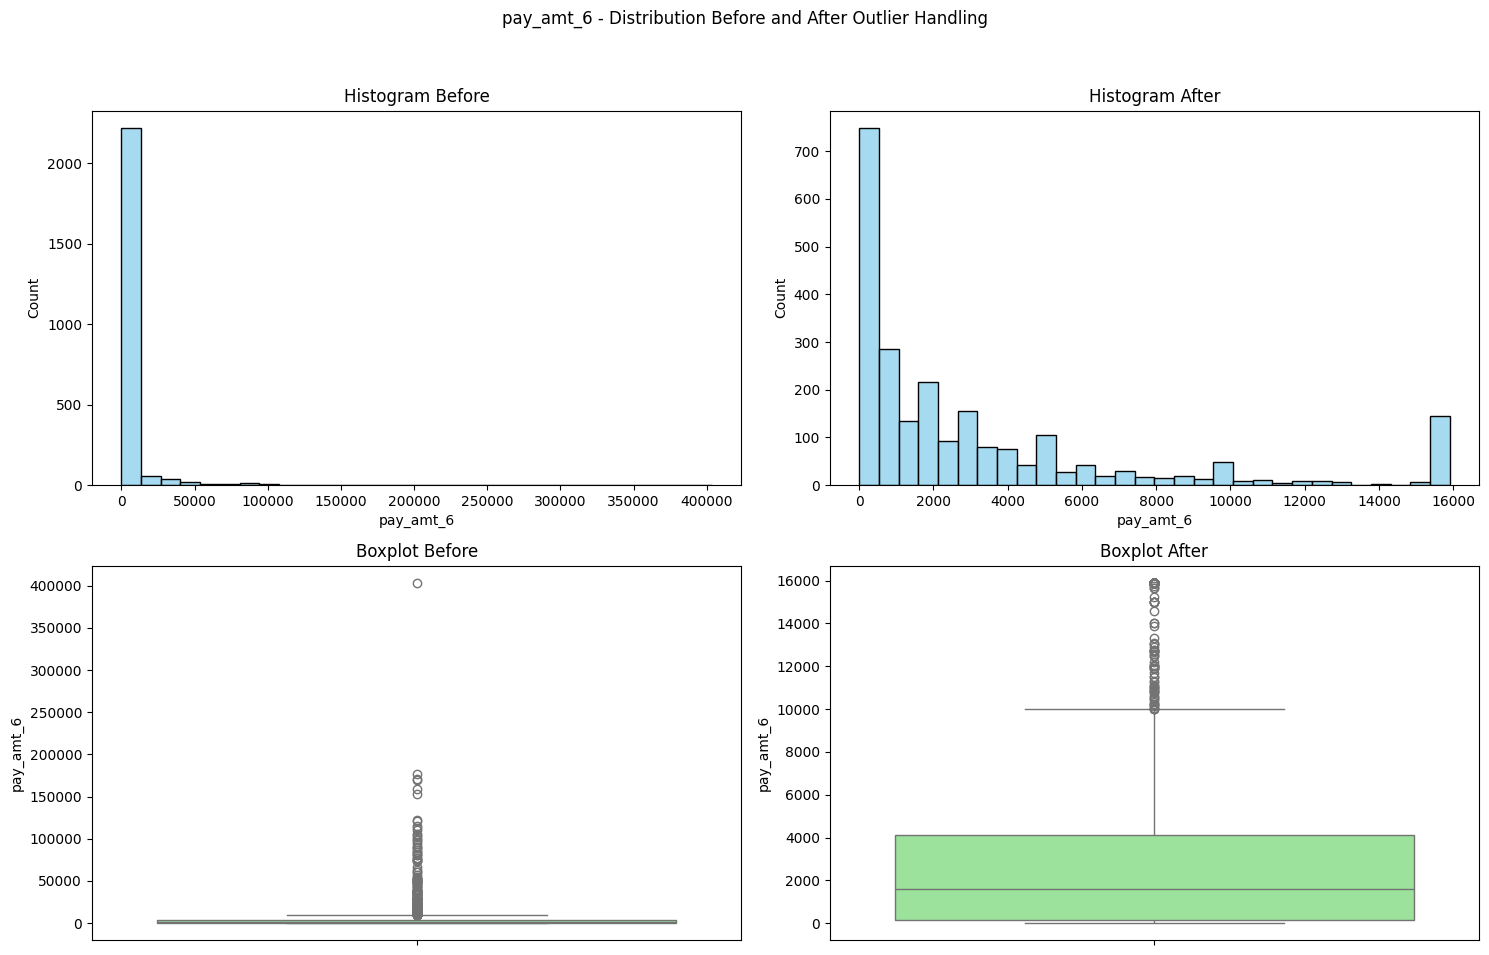

In [202]:
# Tampilkan
num_cols = numeric_columns
for col in num_cols:
    outlier_handling_plot_comparison(X_train, X_train_capped, col)

## Feature Selection (Correlation Analysis)

In [203]:
#Pengkategorian Kolom
num_cols = df_fa.select_dtypes(include='number').columns
cat_cols = df_fa.select_dtypes(include='object').columns

In [204]:
#buat dataframe gabungan untuk analisis
df_fa = pd.concat([X_train_capped, y_train], axis=1)

<Axes: >

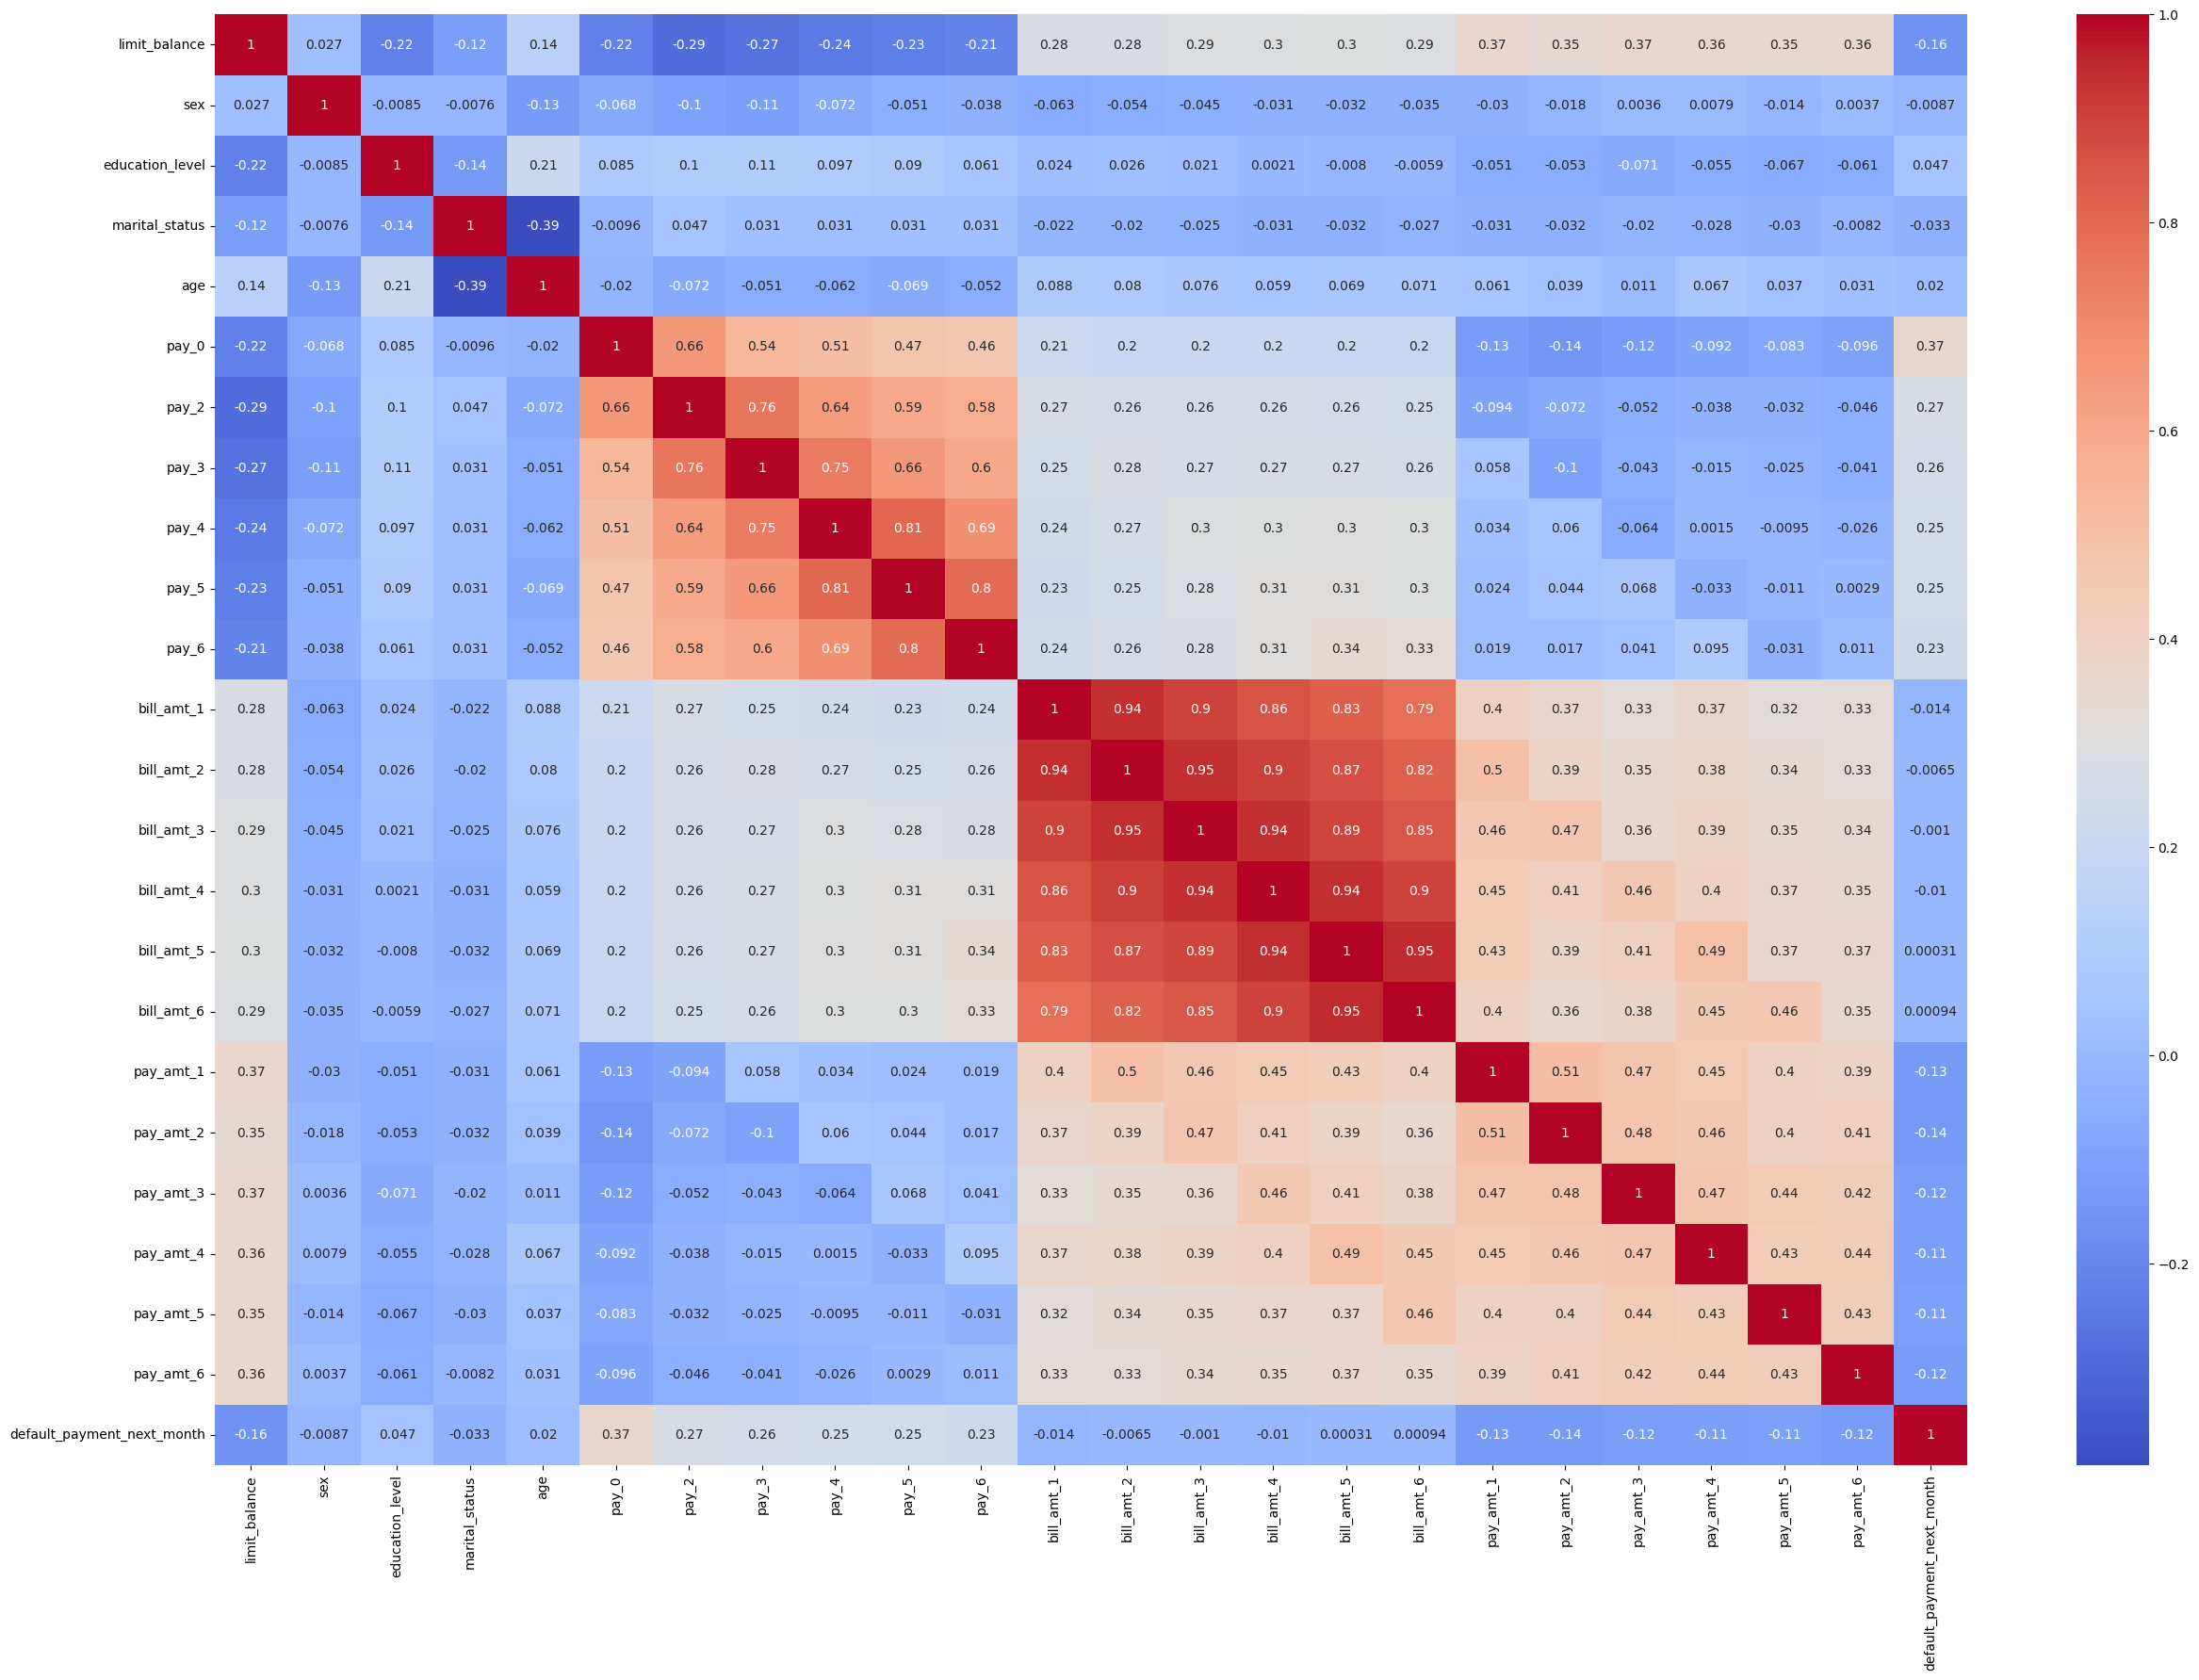

In [146]:
#Plotting heatmap korelasi fitur terhadap target
corr = df_fa[num_cols].corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap='coolwarm', annot=True)

`Dapat dilihat korelasi antar fitur serta fitur terhadap target pada dataset`

In [205]:
#Importing PointBiserialr
from scipy.stats import pointbiserialr

In [206]:
p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_capped.columns:
    corr_coef, p_value = pointbiserialr(X_train_capped[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
        interpretation.append('Korelasi Signifikan')
    else:
        interpretation.append('Korelasi Tidak Signifikan')

# Buat Dataframe untuk value numerik
correlation_df = pd.DataFrame({
    'Column Name': cols,
    'Correlation Coefficient': corr,
    'P-value': p_values
})

# Interpretasi
correlation_df['Interpretation'] = interpretation

correlation_df


,Column Name,Correlation Coefficient,P-value,Interpretation
0,limit_balance,-0.162315,1.882302e-15,Korelasi Signifikan
1,sex,-0.008657,6.736447e-01,Korelasi Tidak Signifikan
2,education_level,0.047270,2.140307e-02,Korelasi Signifikan
3,marital_status,-0.032558,1.131359e-01,Korelasi Tidak Signifikan
4,age,0.019759,3.363966e-01,Korelasi Tidak Signifikan
5,pay_0,0.365369,1.007339e-75,Korelasi Signifikan
6,pay_2,0.272595,1.230618e-41,Korelasi Signifikan
7,pay_3,0.255028,1.735612e-36,Korelasi Signifikan
8,pay_4,0.252044,1.190620e-35,Korelasi Signifikan
9,pay_5,0.245810,6.126306e-34,Korelasi Signifikan


,Column Name,Correlation Coefficient,P-value,Interpretation
0,limit_balance,-0.162315,1.882302e-15,Korelasi Signifikan
1,sex,-0.008657,6.736447e-01,Korelasi Tidak Signifikan
2,education_level,0.047270,2.140307e-02,Korelasi Signifikan
3,marital_status,-0.032558,1.131359e-01,Korelasi Tidak Signifikan
4,age,0.019759,3.363966e-01,Korelasi Tidak Signifikan
5,pay_0,0.365369,1.007339e-75,Korelasi Signifikan
6,pay_2,0.272595,1.230618e-41,Korelasi Signifikan
7,pay_3,0.255028,1.735612e-36,Korelasi Signifikan
8,pay_4,0.252044,1.190620e-35,Korelasi Signifikan
9,pay_5,0.245810,6.126306e-34,Korelasi Signifikan


`Terlihat bahwa terdapat 14 fitur yang signifikan terhadap target, sehingga ke-14nya akan digunakan dalam proses pembangunann model`

In [207]:
# Kolom yang signifikan pada data train
selected_columns = ['limit_balance', 'education_level', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
selected_columns

['limit_balance',
 'education_level',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

['limit_balance',
 'education_level',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'pay_amt_1',
 'pay_amt_2',
 'pay_amt_3',
 'pay_amt_4',
 'pay_amt_5',
 'pay_amt_6']

In [208]:
#Assign variables again based on the relevant
X_train_selected = X_train_capped[selected_columns]
X_test_selected = X_test_capped[selected_columns]

In [209]:
X_train_selected.head()

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1830,110000.0,1,3.0,2.0,2.0,3.0,2.0,2.0,0.0,5800.0,0.0,0.0,8774.0,0.0
1346,50000.0,1,0.0,0.0,2.0,0.0,0.0,0.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0
143,290000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,8000.0,8600.0,6700.0,2600.0,3500.0,0.0
152,360000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,17020.0,17069.0,16560.0,15148.0,0.0,0.0
1803,230000.0,1,0.0,0.0,2.0,2.0,2.0,0.0,5000.0,0.0,3000.0,0.0,3000.0,3000.0


,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1830,110000.0,1,3.0,2.0,2.0,3.0,2.0,2.0,0.0,5800.0,0.0,0.0,8774.0,0.0
1346,50000.0,1,0.0,0.0,2.0,0.0,0.0,0.0,5350.0,0.0,1085.0,2000.0,1226.0,2415.0
143,290000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,8000.0,8600.0,6700.0,2600.0,3500.0,0.0
152,360000.0,1,0.0,0.0,0.0,0.0,0.0,0.0,17020.0,17069.0,16560.0,15148.0,0.0,0.0
1803,230000.0,1,0.0,0.0,2.0,2.0,2.0,0.0,5000.0,0.0,3000.0,0.0,3000.0,3000.0


In [210]:
X_test_selected.head()

,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2960,80000.0,3,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,2800.0,0.0,0.0,0.0,0.0,0.0
1367,30000.0,1,1.0,2.0,2.0,2.0,0.0,0.0,1500.0,3433.0,0.0,800.0,1000.0,1000.0
2737,60000.0,2,1.0,-1.0,0.0,0.0,-2.0,-1.0,17020.0,1126.0,0.0,0.0,567.0,1222.0
2239,280000.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,380.0,5118.0,380.0,380.0,380.0,380.0
977,80000.0,2,0.0,0.0,0.0,0.0,0.0,2.0,3000.0,1800.0,3000.0,6000.0,2900.0,2000.0


,limit_balance,education_level,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2960,80000.0,3,-1.0,-1.0,-1.0,-2.0,-2.0,-2.0,2800.0,0.0,0.0,0.0,0.0,0.0
1367,30000.0,1,1.0,2.0,2.0,2.0,0.0,0.0,1500.0,3433.0,0.0,800.0,1000.0,1000.0
2737,60000.0,2,1.0,-1.0,0.0,0.0,-2.0,-1.0,17020.0,1126.0,0.0,0.0,567.0,1222.0
2239,280000.0,1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,380.0,5118.0,380.0,380.0,380.0,380.0
977,80000.0,2,0.0,0.0,0.0,0.0,0.0,2.0,3000.0,1800.0,3000.0,6000.0,2900.0,2000.0


## Scaling

In [211]:
#Import library untuk pipeline dan scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [212]:
# membuat preprocessor untuk pipeline
preprocessor = ColumnTransformer([('numeric', StandardScaler(), selected_columns)], remainder='passthrough')

# Modelling

## Model Definition

`Logistic Regression:`

adalah model statistik yang digunakan untuk memprediksi probabilitas peristiwa yang terjadi atau tidak terjadi dengan menggunakan satu atau lebih variabel independen.

`Parameter:`
**C**, Kebalikan dari kekuatan regularisasi (semakin kecil nilainya, semakin kuat regularisasinya).

**penalty**, Jenis regularisasi yang digunakan, bisa berupa 'l1' (Lasso) atau 'l2' (Ridge).

**solver**, Algoritma yang digunakan untuk menemukan parameter model, seperti 'liblinear', 'sag', 'lbfgs', dll.

**max_iter**, Jumlah iterasi maksimum yang akan dieksekusi oleh solver.


---

`k-Nearest Neighbors (kNN):`

adalah algoritma machine learning yang sederhana dan intuitif yang digunakan untuk klasifikasi dan regresi. Untuk klasifikasi, kNN mencari k titik data terdekat dalam ruang fitur dan mengklasifikasikan titik data baru berdasarkan mayoritas dari tetangganya. Untuk regresi, kNN menghitung nilai rata-rata dari k tetangga terdekatnya.

`Parameter:`
**n_neighbors**, Jumlah tetangga yang akan dilihat.
**weights**, Skema bobot yang digunakan dalam perhitungan, seperti 'uniform' (semua tetangga memiliki bobot yang sama) atau 'distance' (tetangga yang lebih dekat memiliki bobot yang lebih besar).
**algorithm**, Algoritma yang digunakan untuk menghitung tetangga terdekat, seperti 'auto', 'ball_tree', 'kd_tree', atau 'brute'.



---

`Support Vector Machine (SVM):`

adalah algoritma machine learning yang dapat digunakan untuk tugas klasifikasi dan regresi. Tujuan utamanya adalah menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur sedemikian rupa sehingga margin antara kelas terdekat maksimal.


`Parameter Utama:`
**C**: Parameter penalti untuk kesalahan klasifikasi.
**kernel**: Jenis kernel yang akan digunakan, seperti 'linear', 'rbf' (Gaussian), 'poly' (polinomial), atau 'sigmoid'.
**gamma**: Koefisien kernel untuk 'rbf', 'poly', dan 'sigmoid'. Semakin besar nilainya, semakin sempit lekukan kernel.
degree: Derajat polinomial untuk kernel polinomial ('poly').
**class_weight**: Menentukan bobot untuk kelas masing-masing. Ini sering digunakan dalam kasus di mana kelas tidak seimbang.


---

`Metriks:`

**F1 score** adalah metrik evaluasi yang umum digunakan dalam tugas klasifikasi untuk mengukur keseimbangan antara presisi (precision) dan recall. F1 score menggabungkan kedua metrik ini menjadi satu angka tunggal untuk memberikan gambaran yang lebih komprehensif tentang kinerja model klasifikasi.

## Model Training dan Evaluation dengan Parameter Default

In [213]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

In [214]:
# Merangkai pipe untuk ketiga model klasifikasi
# Logistic Regression

pipe_logreg = make_pipeline(preprocessor, LogisticRegression(random_state=42))
pipe_logreg.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_logreg.steps)

# KNN

pipe_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipe_knn.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_knn.steps)

# SVM

pipe_svm = make_pipeline(preprocessor, SVC(random_state=42))
pipe_svm.fit(X_train_selected, y_train)

print('Pipeline steps : ', pipe_svm.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['limit_balance', 'education_level', 'pay_0',
                                  'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                                  'pay_amt_1', 'pay_amt_2', 'pay_amt_3',
                                  'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])])), ('logisticregression', LogisticRegression(random_state=42))]
Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['limit_balance', 'education_level', 'pay_0',
                                  'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
                                  'pay_amt_1', 'pay_amt_2', 'pay_amt_3',
                                  'pay_amt_4', 'pay_amt_5', 'pay_amt_6'])])), ('kneighborsclassifier', KNei

In [215]:
# Definisikan ketiga model klasifikasi
models = {
    'Logistic Regression': pipe_logreg,
    'kNN': pipe_knn,
    'SVM': pipe_svm
}

# membuat DataFrame untuk roc_auc score
df_model = pd.DataFrame(columns=models.keys(), index=['Training ROC AUC Score', 'Testing ROC AUC Score'])

# Looping
for model_name, model in models.items():
    # Hitung roc_auc score untuk data train
    y_train_pred = model.predict(X_train_selected)
    training_roc_auc = roc_auc_score(y_train, y_train_pred)

    # Hitung roc_auc score untuk data test
    y_test_pred = model.predict(X_test_selected)
    testing_roc_auc = roc_auc_score(y_test, y_test_pred)

    # Store roc_auc scores in DataFrame
    df_model.loc['Training ROC AUC Score', model_name] = training_roc_auc
    df_model.loc['Testing ROC AUC Score', model_name] = testing_roc_auc

df_model

,Logistic Regression,kNN,SVM
Training ROC AUC Score,0.644906,0.713681,0.681664
Testing ROC AUC Score,0.653552,0.661079,0.652479


,Logistic Regression,kNN,SVM
Training ROC AUC Score,0.644906,0.713681,0.681664
Testing ROC AUC Score,0.653552,0.661079,0.652479


**Dari hasil pemodelan dapat diinterpretasikan:**

`Model Logistic Regression memiliki Training ROC AUC Score (0.64237) hampir sebanding dengan Testing ROC AUC Score (0.654625). Perbedaan antara kedua skor ini tidak terlalu besar, menunjukkan bahwa model mungkin tidak mengalami overfitting atau underfitting yang signifikan. Namun, nilai ROC AUC Score yang lebih rendah secara keseluruhan menandakan bahwa model logistic regression mungkin tidak secara optimal memisahkan kelas.`


---



`Model kNN memiliki Training ROC AUC Score (0.715389) lebih tinggi daripada Testing ROC AUC Score (0.670026). Perbedaan yang cukup signifikan antara kedua skor ini menunjukkan adanya potensi overfitting pada model kNN. Model mungkin terlalu kompleks atau terlalu "memorize" data training, sehingga tidak mampu menggeneralisasi dengan baik pada data baru.`


---


`Model SVM memiliki Training ROC AUC Score (0.681024) hampir sebanding dengan Testing ROC AUC Score (0.657489). Perbedaan antara kedua skor ini juga relatif kecil, menunjukkan bahwa model SVM mungkin tidak mengalami overfitting atau underfitting yang signifikan. Namun, nilai ROC AUC Score yang sedikit lebih rendah secara keseluruhan dibandingkan dengan kNN menandakan bahwa SVM mungkin kurang "fit" terhadap data training.`


---


**Kesimpulannya, dari ketiga base model dengan hyperparameter default yang dievaluasi, model kNN merupakan pilihan terbaik karena:**

- Model kNN memiliki ROC AUC Score tertinggi pada data testing, menunjukkan kemampuan yang lebih baik dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.
- Meskipun memiliki ROC AUC Score yang lebih tinggi pada data training daripada data testing, perbedaannya tidak terlalu signifikan sehingga potensi overfittingnya masih dapat ditoleransi.
- Lebih sederhana secara komputasi dibandingkan dengan SVM.

`Selanjutnya akan dilakukan optimisasi model dengan grid search dan random search dengan harapan adanya peningkatan kualitas dari ketiga model ditandai dengan semakin tinggi dan konsisten nilai ROC AUC Score.`







## Model Optimization

`Lakukan Hyperparamter Tuning untuk mengoptimisasi ketiga model`

In [216]:
#Importing Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Grid Search

#### Logistic Regression

In [217]:
#Membuat grid untuk hyperparameter
params = {'logisticregression__C':  [0.01, 0.1, 1, 10, 100],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'logisticregression__max_iter': [100, 200]}

grid_search = GridSearchCV(pipe_logreg, param_grid=params, cv=5).fit(X_train_selected, y_train)

In [218]:
# menunjukkan parameter terbaik
best_param_logreg = grid_search.best_params_
print(best_param_logreg)
print('\n')
# menunjukkan estimator terbaik
best_pipe_logreg = grid_search.best_estimator_
print(best_pipe_logreg)
# membuat dataframe
print('\n')
result_df_logreg = pd.DataFrame.from_dict(grid_search.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'logisticregression__C': 1, 'logisticregression__max_iter': 100, 'logisticregression__solver': 'newton-cg'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('logisticregression',
                 LogisticRegression(C=1, random_state=42, solver='newton-cg'))])


Index(['m

#### SVM

In [161]:
#Membuat grid untuk hyperparameter
param_grid_svm = {
    'svc__C': [1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'sigmoid']
}

grid_search = GridSearchCV(pipe_svm, param_grid=param_grid_svm, cv=5).fit(X_train_selected, y_train)

In [162]:
# menunjukkan parameter terbaik
best_param_svm = grid_search.best_params_
print(best_param_svm)
print('\n')
# menunjukkan estimator terbaik
best_pipe_svm = grid_search.best_estimator_
print(best_pipe_svm)
# membuat dataframe
print('\n')
result_df_svm = pd.DataFrame.from_dict(grid_search.cv_results_, orient='columns')
print(result_df_svm.columns)

{'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('svc', SVC(C=10, gamma=0.01, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__C', 'param_svc__gam

#### kNN

In [163]:
#Membuat grid untuk hyperparameter
param_grid_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


grid_search = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=5).fit(X_train_selected, y_train)

In [164]:
# menunjukkan parameter terbaik
best_param_knn = grid_search.best_params_
print(best_param_knn)
print('\n')
# menunjukkan estimator terbaik
best_pipe_knn = grid_search.best_estimator_
print(best_pipe_knn)
# membuat dataframe
print('\n')
result_df_knn = pd.DataFrame.from_dict(grid_search.cv_results_, orient='columns')
print(result_df_knn.columns)

{'kneighborsclassifier__algorithm': 'brute', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'uniform'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=9

#### Model Hasil Tuning

In [165]:
# tuned model
models = {
    'Tuned Logistic Regression' : best_pipe_logreg,
    'Tuned SVM': best_pipe_svm,
    'Tuned_kNN' : best_pipe_knn
}

# metriks evaluasi
metrics = {
    'ROC AUC Score': roc_auc_score
}

# Buat DataFrame roc_auc scores untuk training and testing
model_tuning_grid = pd.DataFrame(columns=models.keys(), index=['Training ROC AUC Score', 'Testing ROC AUC Score'])

# Looping
for metric in metrics.keys():
    for model_name, model in models.items():
        # Hitung roc_auc score untuk training data
        y_train_pred = model.predict(X_train_selected)
        training_roc_auc = metrics[metric](y_train, y_train_pred)

        # Hitung roc_auc score untuk testing data
        y_test_pred = model.predict(X_test_selected)
        testing_roc_auc = metrics[metric](y_test, y_test_pred)

        # simpan roc_auc scores in DataFrame
        model_tuning_grid.loc['Training ROC AUC Score', model_name] = training_roc_auc
        model_tuning_grid.loc['Testing ROC AUC Score', model_name] = testing_roc_auc

model_tuning_grid

,Tuned Logistic Regression,Tuned SVM,Tuned_kNN
Training ROC AUC Score,0.644906,0.659968,0.681761
Testing ROC AUC Score,0.653552,0.646751,0.670736


**Setelah dilakukan optimasi dengan grid search, diperoleh:**

`Model Logistic Regression memiliki Training ROC AUC Score (0.64237) hampir sebanding dengan Testing ROC AUC Score (0.654625). Perbedaan antara kedua skor ini tidak terlalu besar, menunjukkan bahwa model mungkin tidak mengalami overfitting atau underfitting yang signifikan. Namun, nilai ROC AUC Score yang lebih rendah secara keseluruhan menandakan bahwa model logistic regression mungkin tidak secara optimal memisahkan kelas.`



---



`Model SVM memiliki Training ROC AUC Score (0.659639) yang hampir sebanding dengan Testing ROC AUC Score (0.647824). Perbedaan antara kedua skor ini relatif kecil, menunjukkan bahwa model SVM mungkin tidak mengalami overfitting atau underfitting yang signifikan. Namun, nilai ROC AUC Score yang sedikit lebih rendah secara keseluruhan dibandingkan dengan model kNN menandakan bahwa SVM mungkin kurang "fit" terhadap data training.`


---



`Model kNN memiliki Training ROC AUC Score (0.677628) lebih tinggi daripada Testing ROC AUC Score (0.680401). Perbedaan yang cukup kecil antara kedua skor ini menunjukkan bahwa model kNN mungkin tidak mengalami overfitting atau underfitting yang signifikan. Namun, perlu diperhatikan bahwa nilai ROC AUC Score yang lebih tinggi pada data testing menunjukkan bahwa model kNN dapat lebih baik dalam melakukan generalisasi pada data yang belum pernah dilihat sebelumnya.`


---


**Kesimpulan:**
Dari ketiga model yang dioptimasi, model kNN merupakan pilihan terbaik karena memiliki ROC AUC Score yang paling konsisten antara data training dan testing, menunjukkan kemampuan yang lebih baik dalam melakukan generalisasi.






### Random Search

#### Logistic Regression

In [166]:
#Membuat list untuk hyperparameter
params = {'logisticregression__C':  [0.01, 0.1, 1, 10, 100],
              'logisticregression__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'logisticregression__max_iter': [100, 200]}

random_search = RandomizedSearchCV(pipe_logreg, param_distributions= params, cv=5).fit(X_train_selected, y_train)

In [167]:
# menunjukkan parameter terbaik
best_param_logreg = random_search.best_params_
print(best_param_logreg)
print('\n')
# menunjukkan estimator terbaik
best_pipe_logreg = random_search.best_estimator_
print(best_pipe_logreg)
# membuat dataframe
print('\n')
result_df_logreg = pd.DataFrame.from_dict(random_search.cv_results_, orient='columns')
print(result_df_logreg.columns)

{'logisticregression__solver': 'liblinear', 'logisticregression__max_iter': 200, 'logisticregression__C': 10}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('logisticregression',
                 LogisticRegression(C=10, max_iter=200, random_state=42,
                  

#### SVM

In [168]:
#Membuat list untuk hyperparameter
param_random_svm = {
    'svc__C': [1, 10, 100, 1000],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf', 'sigmoid']
}

random_search = RandomizedSearchCV(pipe_svm, param_distributions=param_random_svm, cv=5).fit(X_train_selected, y_train)

In [169]:
# menunjukkan parameter terbaik
best_param_svm = random_search.best_params_
print(best_param_svm)
print('\n')
# menunjukkan estimator terbaik
best_pipe_svm = random_search.best_estimator_
print(best_pipe_svm)
# membuat dataframe
print('\n')
result_df_svm = pd.DataFrame.from_dict(random_search.cv_results_, orient='columns')
print(result_df_svm.columns)

{'svc__kernel': 'rbf', 'svc__gamma': 0.01, 'svc__C': 10}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('svc', SVC(C=10, gamma=0.01, random_state=42))])


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_svc__kernel', 'param_svc

#### kNN

In [170]:
#Membuat list untuk hyperparameter
param_random_knn = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


random_search = RandomizedSearchCV(pipe_knn, param_distributions=param_random_knn, cv=5).fit(X_train_selected, y_train)

In [171]:
# menunjukkan parameter terbaik
best_param_knn = random_search.best_params_
print(best_param_knn)
print('\n')
# menunjukkan estimator terbaik
best_pipe_knn = random_search.best_estimator_
print(best_pipe_knn)
# membuat dataframe
print('\n')
result_df_knn = pd.DataFrame.from_dict(random_search.cv_results_, orient='columns')
print(result_df_knn.columns)

{'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__algorithm': 'brute'}


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['limit_balance',
                                                   'education_level', 'pay_0',
                                                   'pay_2', 'pay_3', 'pay_4',
                                                   'pay_5', 'pay_6',
                                                   'pay_amt_1', 'pay_amt_2',
                                                   'pay_amt_3', 'pay_amt_4',
                                                   'pay_amt_5',
                                                   'pay_amt_6'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(algorithm='brute', n_neighbors=9

#### Model Hasil Tuning

In [172]:
# tuned model
models = {
    'Tuned Logistic Regression' : best_pipe_logreg,
    'Tuned SVM': best_pipe_svm,
    'Tuned_kNN' : best_pipe_knn
}

# metriks evaluasi
metrics = {
    'ROC AUC Score': roc_auc_score
}

# Buat DataFrame roc_auc scores untuk training and testing
model_tuning_random = pd.DataFrame(columns=models.keys(), index=['Training ROC AUC Score', 'Testing ROC AUC Score'])

# Looping
for metric in metrics.keys():
    for model_name, model in models.items():
        # Hitung roc_auc score untuk training data
        y_train_pred = model.predict(X_train_selected)
        training_roc_auc = metrics[metric](y_train, y_train_pred)

        # Hitung roc_auc score untuk testing data
        y_test_pred = model.predict(X_test_selected)
        testing_roc_auc = metrics[metric](y_test, y_test_pred)

        # simpan roc_auc scores in DataFrame
        model_tuning_random.loc['Training ROC AUC Score', model_name] = training_roc_auc
        model_tuning_random.loc['Testing ROC AUC Score', model_name] = testing_roc_auc

model_tuning_random

,Tuned Logistic Regression,Tuned SVM,Tuned_kNN
Training ROC AUC Score,0.644638,0.659968,0.681761
Testing ROC AUC Score,0.653552,0.646751,0.670736


`Terlihat bahwa hasil optimisasi dari random search dan grid search adalah sama. Kesamaan hasil antara grid search dan random search menunjukkan bahwa kedua pendekatan mungkin telah menemukan parameter-parameter yang optimal atau mendekati optimal, yang menghasilkan performa model yang serupa. Meskipun pendekatan grid search lebih sistematis dengan memeriksa semua kombinasi parameter, random search cenderung lebih efisien untuk ruang parameter yang besar. `

## Model Saving

In [173]:
#Library saving
import pickle

In [174]:
pickle.dump(best_pipe_logreg, open('model_logreg_tuned.pkl', 'wb'))
pickle.dump(best_pipe_svm, open('model_svm_tuned.pkl', 'wb'))
pickle.dump(best_pipe_knn, open('model_knn_tuned.pkl', 'wb'))

## Model Inference

In [175]:
#load model
with open('model_logreg_tuned.pkl', 'rb') as file1:
    best_pipe_logreg = pickle.load(file1)
with open('model_svm_tuned.pkl', 'rb') as file2:
    best_pipe_svm = pickle.load(file2)
with open('model_knn_tuned.pkl', 'rb') as file3:
    best_pipe_knn = pickle.load(file3)

In [176]:
#Panggil data inference yang telah dibuat diawal
df_inference

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
2962,450000.0,2,2,1,38.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,390.0,390.0,780.0,390.0,390.0,390.0,390.0
2963,50000.0,2,2,1,44.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,390.0,390.0,390.0,0.0,390.0,390.0,390.0,390.0,0.0,780.0
2964,290000.0,2,2,1,39.0,1.0,-2.0,-2.0,-2.0,-2.0,...,390.0,3184.0,390.0,390.0,10000.0,800.0,3184.0,390.0,390.0,6617.0


In [177]:
# Tuned model
models = {
    'Tuned Logistic Regression': best_pipe_logreg,
    'Tuned SVM': best_pipe_svm,
    'Tuned_kNN': best_pipe_knn
}

# Buat DataFrame untuk hasil prediksi
prediction_results = pd.DataFrame(index=df_inference.index)

# Looping untuk prediksi
for model_name, model in models.items():
    # Prediksi untuk setiap baris data
    y_pred = model.predict(df_inference)

    # Simpan hasil prediksi ke dalam DataFrame
    prediction_results[model_name] = y_pred

print(prediction_results)

      Tuned Logistic Regression  Tuned SVM  Tuned_kNN
2962                        0.0        0.0        0.0
2963                        0.0        0.0        0.0
2964                        0.0        0.0        0.0


`Data berhasil diprediksi`

# Kesimpulan

`Setelah berhasil menyelesaikan proses membangun dan mengimplementasikan ketiga model, dapat disimpulkan bahwa setiap model memiliki kelebihan uniknya masing-masing. Logistic regression memiliki kelebihan dalam interpretasi yang mudah dan efisiensi komputasi yang tinggi. SVM efektif dalam menangani dataset dengan pemisah yang kompleks dan memiliki kemampuan untuk bekerja dengan baik dalam ruang dimensi tinggi. Sedangkan kNN memiliki kemampuan untuk menangani pola-pola lokal yang kompleks dan fleksibilitas dalam menyesuaikan diri dengan struktur data yang beragam. Oleh karena itu, pemahaman karakteristik dan kelebihan masing-masing model memungkinkan saya untuk memilih dan menyesuaikan model yang paling sesuai dengan kebutuhan dan karakteristik data yang dihadapi.`

# Conceptual Problem

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

   `Coefficients dalam logistic regression adalah nilai-nilai yang me-multiplikasi setiap fitur dalam model. Coefficients menggambarkan seberapa besar dan arah hubungan antara setiap fitur dengan variabel target dalam bentuk log-odds. Dalam konteks klasifikasi biner, coefficients menunjukkan seberapa besar pengaruh setiap fitur terhadap probabilitas kelas yang diprediksi.`

2. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

  `Parameter kernel pada SVM digunakan untuk menentukan jenis fungsi kernel yang digunakan dalam memetakan data ke dalam ruang dimensi yang lebih tinggi. Fungsi kernel ini memungkinkan SVM untuk bekerja efektif dalam menangani data yang tidak linear secara alami.`

  `Contohnya radial basis function (RBF). Fungsi kernel RBF mengubah data ke dalam ruang dimensi yang tak hingga dengan menggunakan fungsi Gaussian radial basis. Fungsi ini mengukur jarak atau kemiripan antara titik data dalam bentuk distribusi Gaussian.`

3. Bagaimana cara memilih K yang optimal pada KNN ?

   `Untuk mencari K yang optimal, kita dapat menggunakan metode grid search sesuai dengan yan gtelah saya implementasikan pada code diatas. Metode grid search bekerja dengan cara mencoba sejumlah nilai K yang berbeda dan mengevaluasi kinerjanya menggunakan metrik evaluasi yang relevan (misalnya, akurasi atau F1-score) pada data validasi.`

4. Apa yang dimaksud dengan metrics-metrics berikut : Accuracy, Precision, Recall, F1 Score, dan kapan waktu yang tepat untuk menggunakannya ?
   
   `Accuracy:`

   Penjelasan: Akurasi adalah metrik evaluasi yang mengukur seberapa akurat model dalam melakukan klasifikasi secara keseluruhan. Ini dihitung sebagai rasio jumlah prediksi yang benar (positif dan negatif) terhadap jumlah total prediksi.

   Penggunaan: Akurasi cocok digunakan saat kelas target memiliki distribusi yang seimbang di antara kelas positif dan negatif. Namun, jika kelas target tidak seimbang, akurasi bisa menjadi tidak representatif.
   Precision:

   Penjelasan: Presisi adalah metrik evaluasi yang mengukur seberapa banyak dari prediksi positif yang sebenarnya benar positif. Ini menggambarkan tingkat keakuratan prediksi positif.
   Penggunaan: Precision cocok digunakan ketika penting untuk meminimalkan jumlah hasil positif palsu. Misalnya, dalam deteksi spam email, precision akan memberi tahu seberapa sering email yang tidak spam diidentifikasi sebagai spam.
    
   `Recall:`

   Penjelasan: Recall, juga dikenal sebagai sensitivitas, adalah metrik evaluasi yang mengukur seberapa banyak dari total kelas positif yang benar diprediksi oleh model. Ini menggambarkan kemampuan model untuk mendeteksi semua sampel positif.

   Penggunaan: Recall penting ketika prioritas utama adalah untuk mendeteksi sebanyak mungkin sampel positif, meskipun dengan meningkatkan jumlah hasil positif palsu. Misalnya, dalam sistem deteksi penyakit, recall yang tinggi diperlukan untuk memastikan bahwa sebanyak mungkin kasus penyakit dideteksi.

   `F1 Score:`

   Penjelasan: F1 Score adalah metrik evaluasi yang menggabungkan presisi dan recall menjadi satu angka tunggal. Ini adalah harmonic mean dari presisi dan recall, memberikan gambaran keseluruhan tentang kinerja model.

   Penggunaan: F1 Score berguna saat keseimbangan antara presisi dan recall penting. Misalnya, dalam deteksi kecurangan transaksi kartu kredit, di mana kecurangan hanya terjadi pada sebagian kecil dari transaksi.